In [1]:
import pandas as pd  
import matplotlib.pylab as plt  
%matplotlib inline  
import numpy as np  
from scipy.stats import linregress  
import scipy.stats as stats  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix  
from matplotlib.colors import ListedColormap  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  


In [2]:
# Read CSV files from Wendy directories
calendar = pd.read_csv("calendar.csv")
evaluation = pd.read_csv("sales_train_evaluation.csv")
validation = pd.read_csv("sales_train_validation.csv")
prices = pd.read_csv("sell_prices.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
# Display information about the sample DataFrame
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [4]:
include = ['object', 'float', 'int']
sample.describe(include=include)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,60980,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,...,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0
unique,60980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HOBBIES_1_001_CA_1_validation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
sample.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,...,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
sample.isnull().any()

id     False
F1     False
F2     False
F3     False
F4     False
F5     False
F6     False
F7     False
F8     False
F9     False
F10    False
F11    False
F12    False
F13    False
F14    False
F15    False
F16    False
F17    False
F18    False
F19    False
F20    False
F21    False
F22    False
F23    False
F24    False
F25    False
F26    False
F27    False
F28    False
dtype: bool

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [8]:
include = ['object', 'float', 'int']
calendar.describe(include=include)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
count,1969,1969.000000,1969,1969.000000,1969.000000,1969.000000,1969,162,162,5,5,1969.000000,1969.000000,1969.000000
unique,1969,NaN,7,NaN,NaN,NaN,1969,30,4,4,2,NaN,NaN,NaN
top,2011-01-29,NaN,Saturday,NaN,NaN,NaN,d_1,SuperBowl,Religious,Father's day,Cultural,NaN,NaN,NaN
freq,1,NaN,282,NaN,NaN,NaN,1,6,55,2,4,NaN,NaN,NaN
mean,NaN,11347.086338,NaN,3.997461,6.325546,2013.288471,NaN,NaN,NaN,NaN,NaN,0.330117,0.330117,0.330117
std,NaN,155.277043,NaN,2.001141,3.416864,1.580198,NaN,NaN,NaN,NaN,NaN,0.470374,0.470374,0.470374
min,NaN,11101.000000,NaN,1.000000,1.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,11219.000000,NaN,2.000000,3.000000,2012.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,11337.000000,NaN,4.000000,6.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,NaN,11502.000000,NaN,6.000000,9.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [9]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [10]:
calendar.isnull().any()

date            False
wm_yr_wk        False
weekday         False
wday            False
month           False
year            False
d               False
event_name_1     True
event_type_1     True
event_name_2     True
event_type_2     True
snap_CA         False
snap_TX         False
snap_WI         False
dtype: bool

In [11]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [12]:
include = ['object', 'float', 'int']
evaluation.describe(include=include)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490,30490,30490,30490,30490,30490,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
unique,30490,3049,7,3,10,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,FOODS_3,FOODS,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10,8230,14370,3049,12196,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.070220,1.041292,0.780026,0.833454,...,1.445490,1.781174,1.965267,1.389374,1.271794,1.216661,1.212299,1.395605,1.689669,1.782158
std,NaN,NaN,NaN,NaN,NaN,NaN,5.126689,5.365468,3.667454,4.415141,...,3.656824,4.426550,4.706284,3.313292,3.126178,3.000348,2.955910,3.514318,4.089208,4.284356
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [13]:
evaluation.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1937      False
d_1938      False
d_1939      False
d_1940      False
d_1941      False
Length: 1947, dtype: bool

In [14]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [15]:
include = ['object', 'float', 'int']
validation.describe(include=include)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490,30490,30490,30490,30490,30490,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
unique,30490,3049,7,3,10,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,FOODS_3,FOODS,CA_1,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10,8230,14370,3049,12196,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.070220,1.041292,0.780026,0.833454,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,NaN,NaN,NaN,NaN,NaN,NaN,5.126689,5.365468,3.667454,4.415141,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [16]:
validation.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1909      False
d_1910      False
d_1911      False
d_1912      False
d_1913      False
Length: 1919, dtype: bool

In [17]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [18]:
include = ['object', 'float', 'int']
prices.describe(include=include)

,store_id,item_id,wm_yr_wk,sell_price
count,6841121,6841121,6.841121e+06,6.841121e+06
unique,10,3049,NaN,NaN
top,TX_2,FOODS_3_587,NaN,NaN
freq,701214,2820,NaN,NaN
mean,NaN,NaN,1.138294e+04,4.410952e+00
std,NaN,NaN,1.486100e+02,3.408814e+00
min,NaN,NaN,1.110100e+04,1.000000e-02
25%,NaN,NaN,1.124700e+04,2.180000e+00
50%,NaN,NaN,1.141100e+04,3.470000e+00
75%,NaN,NaN,1.151700e+04,5.840000e+00


In [19]:
prices.isnull().any()

store_id      False
item_id       False
wm_yr_wk      False
sell_price    False
dtype: bool

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [21]:
d_cols = [col for col in evaluation.columns if col.startswith('d_')]
d_cols

['d_1',
 'd_2',
 'd_3',
 'd_4',
 'd_5',
 'd_6',
 'd_7',
 'd_8',
 'd_9',
 'd_10',
 'd_11',
 'd_12',
 'd_13',
 'd_14',
 'd_15',
 'd_16',
 'd_17',
 'd_18',
 'd_19',
 'd_20',
 'd_21',
 'd_22',
 'd_23',
 'd_24',
 'd_25',
 'd_26',
 'd_27',
 'd_28',
 'd_29',
 'd_30',
 'd_31',
 'd_32',
 'd_33',
 'd_34',
 'd_35',
 'd_36',
 'd_37',
 'd_38',
 'd_39',
 'd_40',
 'd_41',
 'd_42',
 'd_43',
 'd_44',
 'd_45',
 'd_46',
 'd_47',
 'd_48',
 'd_49',
 'd_50',
 'd_51',
 'd_52',
 'd_53',
 'd_54',
 'd_55',
 'd_56',
 'd_57',
 'd_58',
 'd_59',
 'd_60',
 'd_61',
 'd_62',
 'd_63',
 'd_64',
 'd_65',
 'd_66',
 'd_67',
 'd_68',
 'd_69',
 'd_70',
 'd_71',
 'd_72',
 'd_73',
 'd_74',
 'd_75',
 'd_76',
 'd_77',
 'd_78',
 'd_79',
 'd_80',
 'd_81',
 'd_82',
 'd_83',
 'd_84',
 'd_85',
 'd_86',
 'd_87',
 'd_88',
 'd_89',
 'd_90',
 'd_91',
 'd_92',
 'd_93',
 'd_94',
 'd_95',
 'd_96',
 'd_97',
 'd_98',
 'd_99',
 'd_100',
 'd_101',
 'd_102',
 'd_103',
 'd_104',
 'd_105',
 'd_106',
 'd_107',
 'd_108',
 'd_109',
 'd_110',
 'd_111'

In [22]:
fix = evaluation[d_cols].stack().reset_index(level=1)
fix.columns = ['d','unit_sale']
fix

,d,unit_sale
0,d_1,0
0,d_2,0
0,d_3,0
0,d_4,0
0,d_5,0
...,...,...
30489,d_1937,0
30489,d_1938,2
30489,d_1939,2
30489,d_1940,5


In [23]:
my_data = evaluation.drop(d_cols, axis=1).join(fix)
my_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0
...,...,...,...,...,...,...,...,...
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1937,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1938,2
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1939,2
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1940,5


In [24]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 30489
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id         object
 1   item_id    object
 2   dept_id    object
 3   cat_id     object
 4   store_id   object
 5   state_id   object
 6   d          object
 7   unit_sale  int64 
dtypes: int64(1), object(7)
memory usage: 4.0+ GB


In [25]:
my_data['id']=my_data['id'].astype('category')
my_data['item_id']=my_data['item_id'].astype('category')
my_data['dept_id']=my_data['dept_id'].astype('category')
my_data['cat_id']=my_data['cat_id'].astype('category')
my_data['store_id']=my_data['store_id'].astype('category')
my_data['state_id']=my_data['state_id'].astype('category')
my_data['d']=my_data['d'].astype('category')

my_data['unit_sale']=pd.to_numeric(my_data['unit_sale'],downcast='unsigned')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 30489
Data columns (total 8 columns):
 #   Column     Dtype   
---  ------     -----   
 0   id         category
 1   item_id    category
 2   dept_id    category
 3   cat_id     category
 4   store_id   category
 5   state_id   category
 6   d          category
 7   unit_sale  uint16  
dtypes: category(7), uint16(1)
memory usage: 1.1 GB


In [26]:

calendar['date']=calendar['date'].astype('datetime64')

calendar['weekday']=calendar['weekday'].astype('category')
calendar['d']=calendar['d'].astype('category')
calendar['event_name_1']=calendar['event_name_1'].astype('category')
calendar['event_name_2']=calendar['event_name_2'].astype('category')
calendar['event_type_1']=calendar['event_type_1'].astype('category')
calendar['event_type_2']=calendar['event_type_2'].astype('category')
calendar['snap_CA']=calendar['snap_CA'].astype('bool')
calendar['snap_TX']=calendar['snap_TX'].astype('bool')
calendar['snap_WI']=calendar['snap_WI'].astype('bool')

calendar['wm_yr_wk'] = pd.to_numeric(calendar['wm_yr_wk'], downcast='unsigned')
calendar['wday'] = pd.to_numeric(calendar['wday'], downcast='unsigned')
calendar['month'] = pd.to_numeric(calendar['month'], downcast='unsigned')
calendar['year'] = pd.to_numeric(calendar['year'], downcast='unsigned')

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   uint16        
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   uint8         
 4   month         1969 non-null   uint8         
 5   year          1969 non-null   uint16        
 6   d             1969 non-null   category      
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   event_name_2  5 non-null      category      
 10  event_type_2  5 non-null      category      
 11  snap_CA       1969 non-null   bool          
 12  snap_TX       1969 non-null   bool          
 13  snap_WI       1969 non-null   bool          
dtypes: bool(3), category(6), datetime64[ns](1), uint16(2), uint8(2)
memory usage: 128.3 KB


In [27]:
prices['store_id'] = prices['store_id'].astype('category')
prices['item_id'] = prices['item_id'].astype('category')

prices['wm_yr_wk'] = pd.to_numeric(prices['wm_yr_wk'], downcast='unsigned')
prices['sell_price'] = pd.to_numeric(prices['sell_price'], downcast='float')

prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    uint16  
 3   sell_price  float32 
dtypes: category(2), float32(1), uint16(1)
memory usage: 58.8 MB


In [28]:
my_data = my_data.merge(calendar, on='d', how='left').merge(prices, on=['store_id','item_id','wm_yr_wk'], how='left')

In [29]:
my_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
1,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
2,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
3,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,True,True,False,NaN
4,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,True,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59181085,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1937,0,2016-05-18,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.0
59181086,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1938,2,2016-05-19,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.0
59181087,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1939,2,2016-05-20,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.0
59181088,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1940,5,2016-05-21,11617,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.0


In [30]:
my_data.isnull().any()

id              False
item_id         False
dept_id         False
cat_id          False
store_id        False
state_id        False
d               False
unit_sale       False
date            False
wm_yr_wk        False
weekday         False
wday            False
month           False
year            False
event_name_1     True
event_type_1     True
event_name_2     True
event_type_2     True
snap_CA         False
snap_TX         False
snap_WI         False
sell_price       True
dtype: bool

In [31]:
my_data['d']=my_data['d'].astype('category')

In [32]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             category      
 7   unit_sale     uint16        
 8   date          datetime64[ns]
 9   wm_yr_wk      uint16        
 10  weekday       category      
 11  wday          uint8         
 12  month         uint8         
 13  year          uint16        
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       bool          
 19  snap_TX       bool          
 20  snap_WI       bool          
 21  sell_price    float32       
dtypes: bool(3), category(12), datetime64[ns](1), float32(1), uint16(

In [33]:
category_prices = my_data.groupby("cat_id")["sell_price"].mean()

In [34]:
# category_prices

In [35]:
sales_by_category= my_data.groupby("cat_id")["unit_sale"].sum()

In [36]:
# sales_by_category

In [37]:
category_prices_df = pd.DataFrame({'cat_id': category_prices.index, 'mean_price': category_prices.values})
sales_by_category_df = pd.DataFrame({'cat_id': sales_by_category.index, 'sum_sale': sales_by_category.values})
category_df = pd.merge(category_prices_df, sales_by_category_df, on='cat_id')
category_df['revenue'] = category_df['mean_price']*category_df['sum_sale']
category_df

,cat_id,mean_price,sum_sale,revenue
0,FOODS,3.248950,45922427.0,1.491997e+08
1,HOBBIES,5.329613,6240656.0,3.326028e+07
2,HOUSEHOLD,5.465684,14764090.0,8.069586e+07


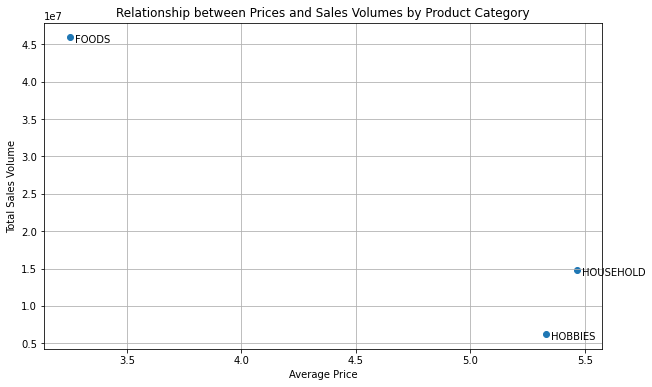

In [38]:
plt.figure(figsize=(10, 6))

# Plotting relationship between average prices and total sales volume for each category
plt.scatter(category_prices, sales_by_category)
plt.title('Relationship between Prices and Sales Volumes by Product Category')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

for i, txt in enumerate(category_prices.index):
    plt.annotate(txt, (category_prices[i], sales_by_category[i]), xytext=(5, -5), textcoords='offset points')

plt.show()

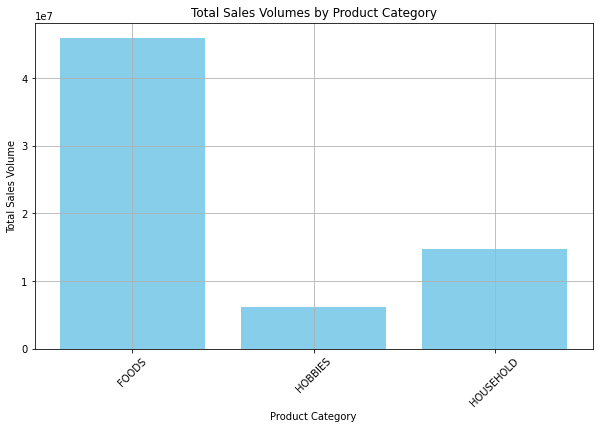

In [39]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(category_prices.index, sales_by_category, color='skyblue')
plt.title('Total Sales Volumes by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)


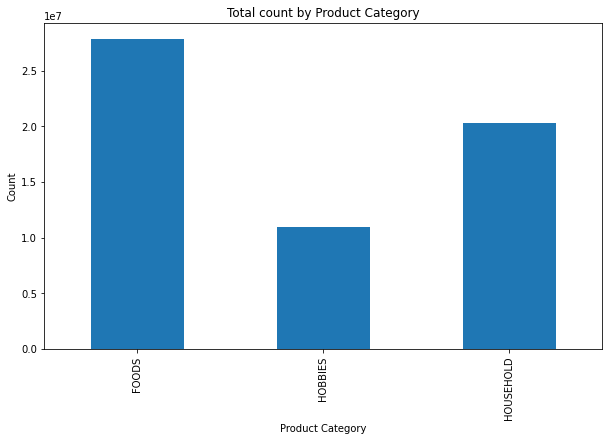

In [40]:
my_data.groupby('cat_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

In [41]:
evaluation_data=evaluation[evaluation.columns[6:]].transpose()
training_dates=pd.to_datetime(calendar['date'])[:evaluation_data.shape[0]]
evaluation_data.index=training_dates
training_dates

0      2011-01-29
1      2011-01-30
2      2011-01-31
3      2011-02-01
4      2011-02-02
          ...    
1936   2016-05-18
1937   2016-05-19
1938   2016-05-20
1939   2016-05-21
1940   2016-05-22
Name: date, Length: 1941, dtype: datetime64[ns]

In [42]:
cat_sales=evaluation.groupby('cat_id').sum().transpose()
cat_sales.index=training_dates
cat_sales

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729
...,...,...,...
2016-05-18,24790,3740,8566
2016-05-19,24737,3475,8751
2016-05-20,28136,4143,10273


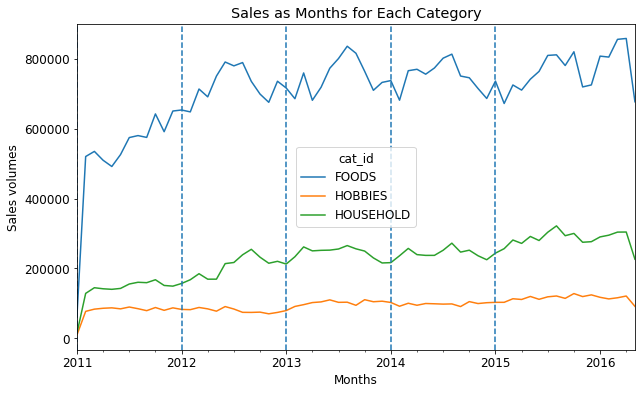

In [43]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
cat_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Category')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

In [44]:
dept_prices = my_data.groupby("dept_id")["sell_price"].mean()
dept_prices

dept_id
FOODS_1        3.373836
FOODS_2        4.081236
FOODS_3        2.840550
HOBBIES_1      6.218061
HOBBIES_2      2.689264
HOUSEHOLD_1    5.054952
HOUSEHOLD_2    5.857228
Name: sell_price, dtype: float32

In [45]:
sales_by_dept = my_data.groupby('dept_id')["unit_sale"].sum()
sales_by_dept

dept_id
FOODS_1         5190400.0
FOODS_2         7795025.0
FOODS_3        32937002.0
HOBBIES_1       5699014.0
HOBBIES_2        541642.0
HOUSEHOLD_1    11722853.0
HOUSEHOLD_2     3041237.0
Name: unit_sale, dtype: float64

In [46]:
dept_prices_df = pd.DataFrame({'dept_id': dept_prices.index, 'mean_price': dept_prices.values})
sales_by_dept_df = pd.DataFrame({'dept_id': sales_by_dept.index, 'sum_sale': sales_by_dept.values})
dept_df = pd.merge(dept_prices_df, sales_by_dept_df, on='dept_id')
dept_df['revenue'] = dept_df['mean_price']*dept_df['sum_sale']
dept_df

,dept_id,mean_price,sum_sale,revenue
0,FOODS_1,3.373836,5190400.0,1.751156e+07
1,FOODS_2,4.081236,7795025.0,3.181334e+07
2,FOODS_3,2.840550,32937002.0,9.355921e+07
3,HOBBIES_1,6.218061,5699014.0,3.543682e+07
4,HOBBIES_2,2.689264,541642.0,1.456618e+06
5,HOUSEHOLD_1,5.054952,11722853.0,5.925846e+07
6,HOUSEHOLD_2,5.857228,3041237.0,1.781322e+07


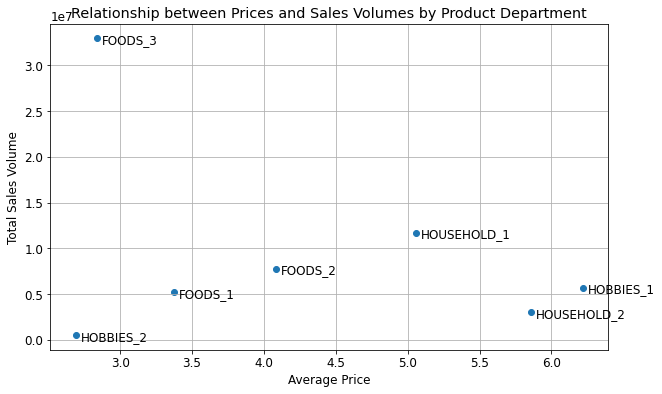

In [47]:
plt.figure(figsize=(10, 6))

# Plotting relationship between average prices and total sales volume for each category
plt.scatter(dept_prices, sales_by_dept)
plt.title('Relationship between Prices and Sales Volumes by Product Department')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

for i, txt in enumerate(dept_prices.index):
    plt.annotate(txt, (dept_prices[i], sales_by_dept[i]), xytext=(5, -5), textcoords='offset points')

plt.show()

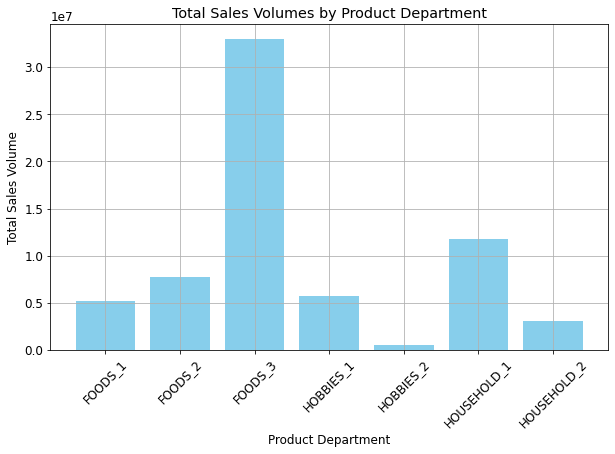

In [48]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(dept_prices.index, sales_by_dept, color='skyblue')
plt.title('Total Sales Volumes by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)



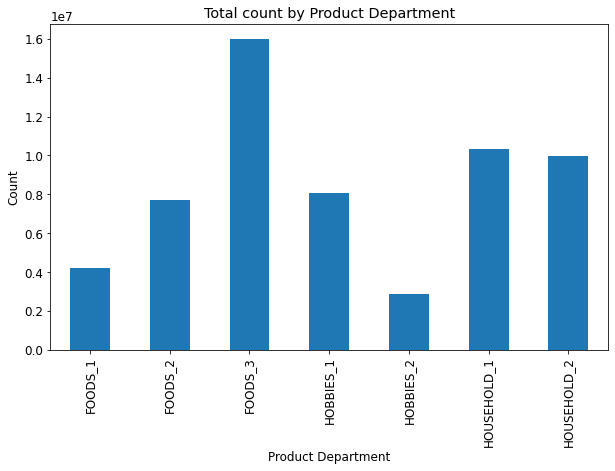

In [49]:
my_data.groupby('dept_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Count')
plt.show()

In [50]:
dept_sales=evaluation.groupby('dept_id').sum().transpose()
dept_sales.index=training_dates
dept_sales

dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
date,,,,,,,
2011-01-29,2343,4094,16741,3610,154,4105,1584
2011-01-30,2216,4209,16333,3172,185,3858,1776
2011-01-31,1657,3174,12343,2497,185,2827,1100
2011-02-01,1508,3606,13764,2531,138,2732,1133
2011-02-02,1209,2869,10525,1714,100,1802,927
...,...,...,...,...,...,...,...
2016-05-18,3073,4648,17069,3291,449,6641,1925
2016-05-19,3251,4551,16935,3027,448,6759,1992
2016-05-20,3735,4815,19586,3761,382,7974,2299


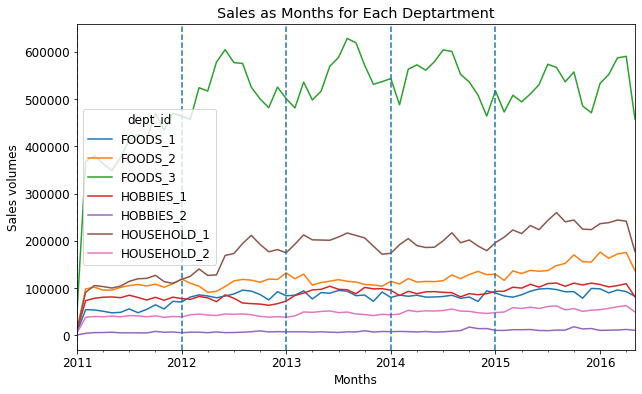

In [51]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Deptartment')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

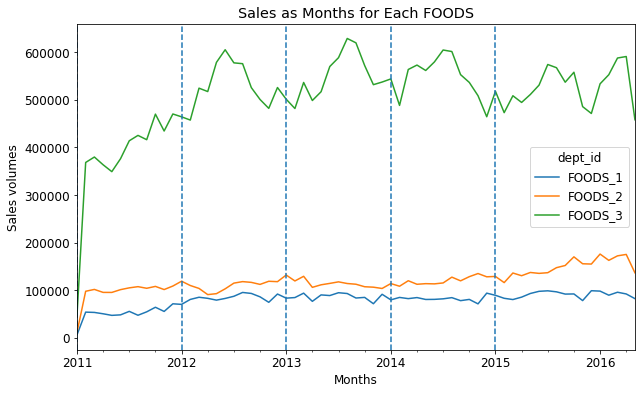

In [52]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales[['FOODS_1','FOODS_2','FOODS_3']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each FOODS')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

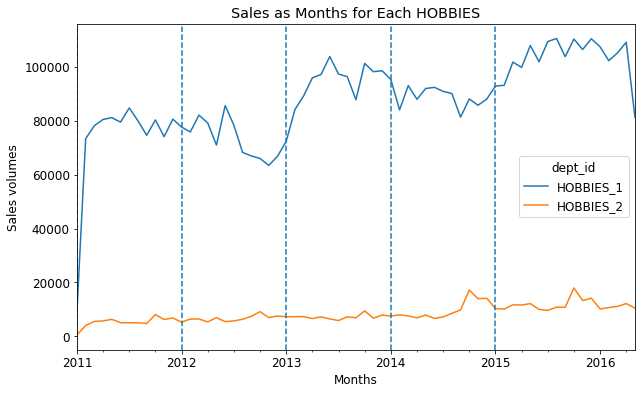

In [53]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales[['HOBBIES_1','HOBBIES_2']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each HOBBIES')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

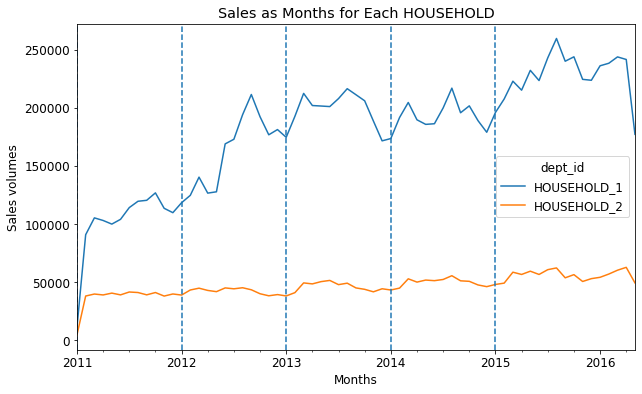

In [54]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales[['HOUSEHOLD_1','HOUSEHOLD_2']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each HOUSEHOLD')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

In [55]:
state_prices = my_data.groupby("state_id")["sell_price"].mean()
state_prices

state_id
CA    4.415229
TX    4.374402
WI    4.437696
Name: sell_price, dtype: float32

In [56]:
sales_by_state = my_data.groupby('state_id')["unit_sale"].sum()
sales_by_state

state_id
CA    29196717.0
TX    19228405.0
WI    18502051.0
Name: unit_sale, dtype: float64

In [57]:
state_prices_df = pd.DataFrame({'state_id': state_prices.index, 'mean_price': state_prices.values})
sales_by_state_df = pd.DataFrame({'state_id': sales_by_state.index, 'sum_sale': sales_by_state.values})
state_df = pd.merge(state_prices_df, sales_by_state_df, on='state_id')
state_df['revenue'] = state_df['mean_price']*state_df['sum_sale']
state_df

,state_id,mean_price,sum_sale,revenue
0,CA,4.415229,29196717.0,1.289102e+08
1,TX,4.374402,19228405.0,8.411277e+07
2,WI,4.437696,18502051.0,8.210649e+07


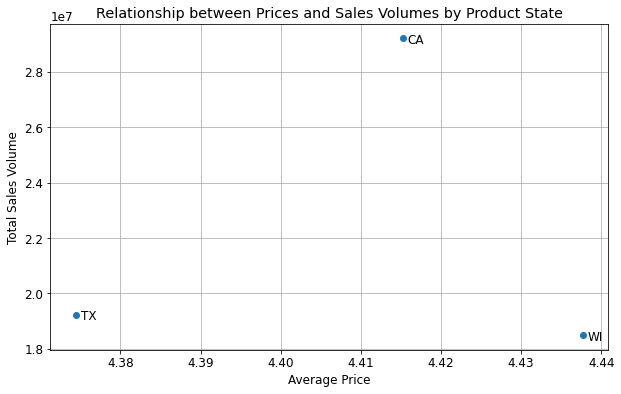

In [58]:
plt.figure(figsize=(10, 6))

# Plotting relationship between average prices and total sales volume for each category
plt.scatter(state_prices, sales_by_state)
plt.title('Relationship between Prices and Sales Volumes by Product State')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

for i, txt in enumerate(state_prices.index):
    plt.annotate(txt, (state_prices[i], sales_by_state[i]), xytext=(5, -5), textcoords='offset points')

plt.show()

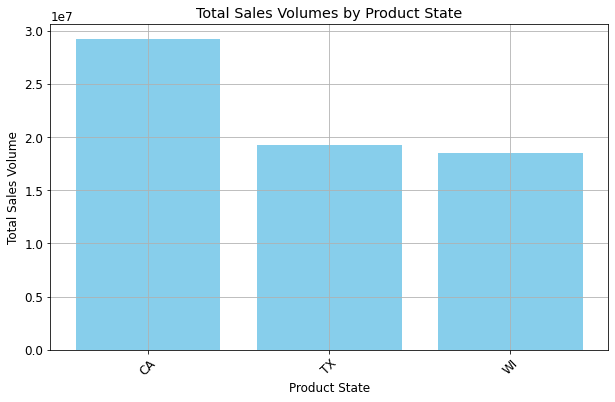

In [59]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(state_prices.index, sales_by_state, color='skyblue')
plt.title('Total Sales Volumes by Product State')
plt.xlabel('Product State')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)


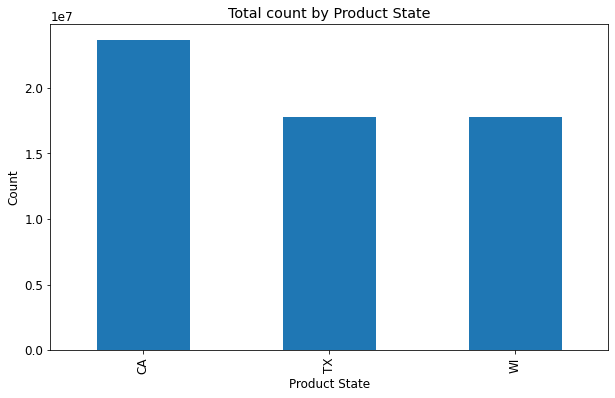

In [60]:
my_data.groupby('state_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product State')
plt.xlabel('Product State')
plt.ylabel('Count')
plt.show()

In [61]:
state_sales=evaluation.groupby('state_id').sum().transpose()
state_sales.index=training_dates
state_sales

state_id,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-05-18,15678,10375,11043
2016-05-19,16297,9162,11504
2016-05-20,17430,12303,12819


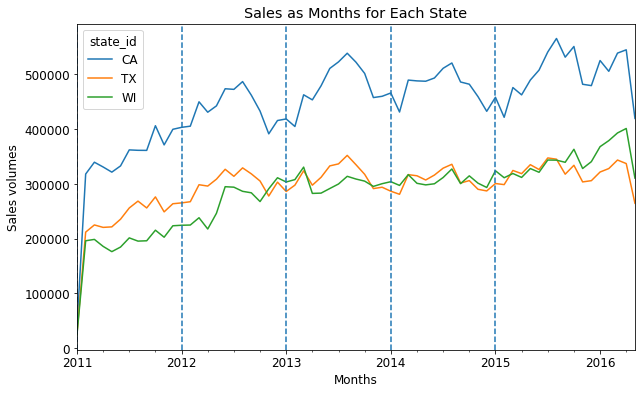

In [62]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
state_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each State')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

In [63]:
store_prices = my_data.groupby("store_id")["sell_price"].mean()
store_prices

store_id
CA_1    4.412670
CA_2    4.444537
CA_3    4.386149
CA_4    4.420126
TX_1    4.372742
TX_2    4.364846
TX_3    4.385783
WI_1    4.456892
WI_2    4.440573
WI_3    4.416549
Name: sell_price, dtype: float32

In [64]:
sales_by_store = my_data.groupby('store_id')["unit_sale"].sum()
sales_by_store

store_id
CA_1     7832248.0
CA_2     5818395.0
CA_3    11363540.0
CA_4     4182534.0
TX_1     5692823.0
TX_2     7329642.0
TX_3     6205940.0
WI_1     5261506.0
WI_2     6697988.0
WI_3     6542557.0
Name: unit_sale, dtype: float64

In [65]:
store_prices_df = pd.DataFrame({'store_id': store_prices.index, 'mean_price': store_prices.values})
sales_by_store_df = pd.DataFrame({'store_id': sales_by_store.index, 'sum_sale': sales_by_store.values})
store_df = pd.merge(store_prices_df, sales_by_store_df, on='store_id')
store_df['revenue'] = store_df['mean_price']*store_df['sum_sale']
store_df

,store_id,mean_price,sum_sale,revenue
0,CA_1,4.412670,7832248.0,3.456112e+07
1,CA_2,4.444537,5818395.0,2.586007e+07
2,CA_3,4.386149,11363540.0,4.984218e+07
3,CA_4,4.420126,4182534.0,1.848733e+07
4,TX_1,4.372742,5692823.0,2.489324e+07
5,TX_2,4.364846,7329642.0,3.199276e+07
6,TX_3,4.385783,6205940.0,2.721791e+07
7,WI_1,4.456892,5261506.0,2.344997e+07
8,WI_2,4.440573,6697988.0,2.974290e+07
9,WI_3,4.416549,6542557.0,2.889552e+07


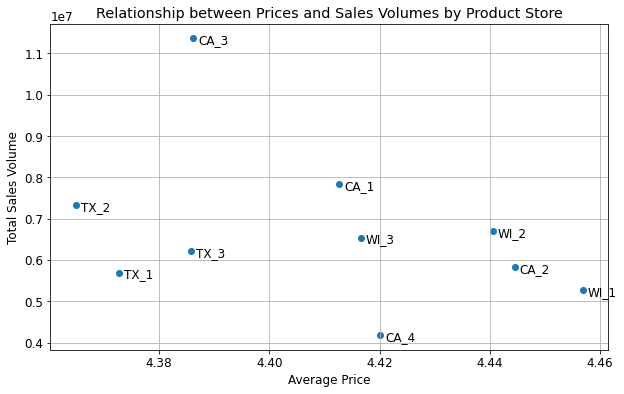

In [66]:
plt.figure(figsize=(10, 6))

# Plotting relationship between average prices and total sales volume for each category
plt.scatter(store_prices, sales_by_store)
plt.title('Relationship between Prices and Sales Volumes by Product Store')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

for i, txt in enumerate(store_prices.index):
    plt.annotate(txt, (store_prices[i], sales_by_store[i]), xytext=(5, -5), textcoords='offset points')

plt.show()

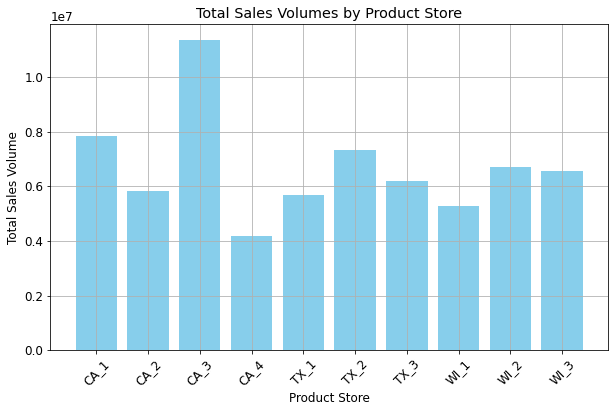

In [67]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(store_prices.index, sales_by_store, color='skyblue')
plt.title('Total Sales Volumes by Product Store')
plt.xlabel('Product Store')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)

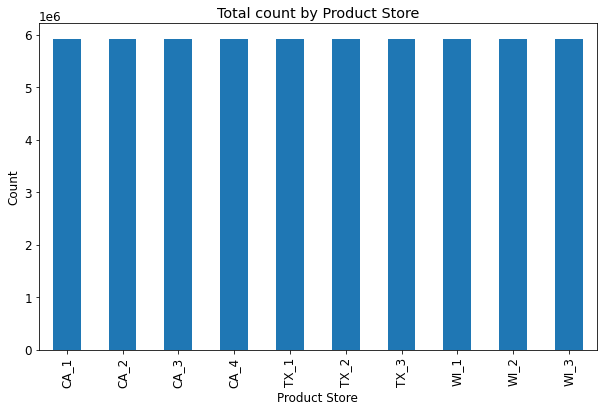

In [68]:
my_data.groupby('store_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product Store')
plt.xlabel('Product Store')
plt.ylabel('Count')
plt.show()

In [69]:
store_sales=evaluation.groupby('store_id').sum().transpose()
store_sales.index=training_dates
store_sales

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,3995,3789,5375,2519,3147,3518,3710,3242,4533,3268
2016-05-19,4136,4037,5580,2544,2748,3126,3288,3478,4628,3398
2016-05-20,4433,4751,5542,2704,3664,4249,4390,3813,4880,4126


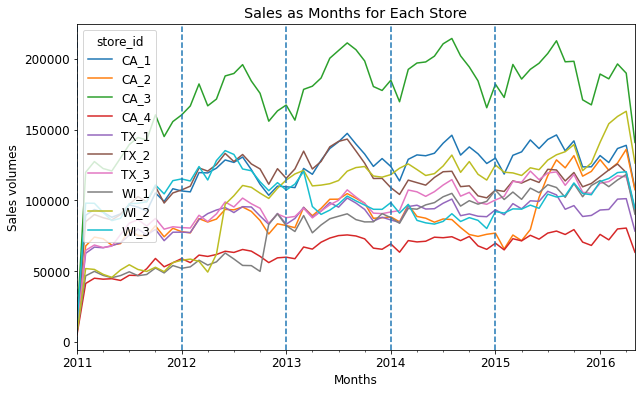

In [70]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

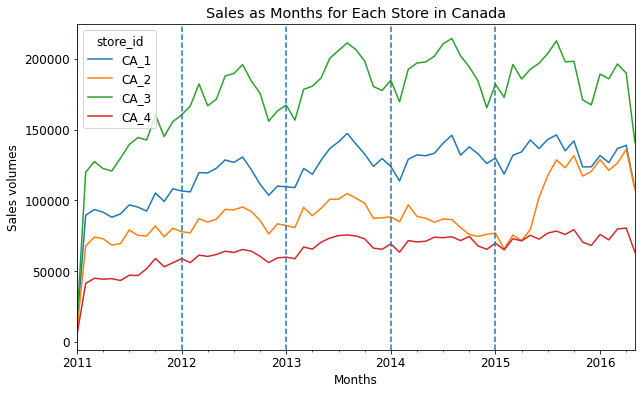

In [71]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales[['CA_1','CA_2','CA_3','CA_4']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store in Canada')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

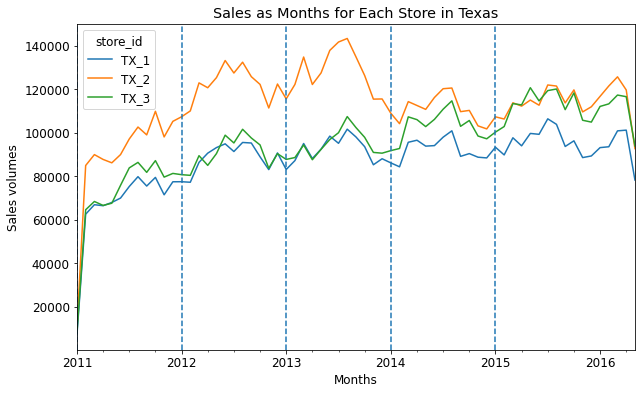

In [72]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales[['TX_1','TX_2','TX_3']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store in Texas')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

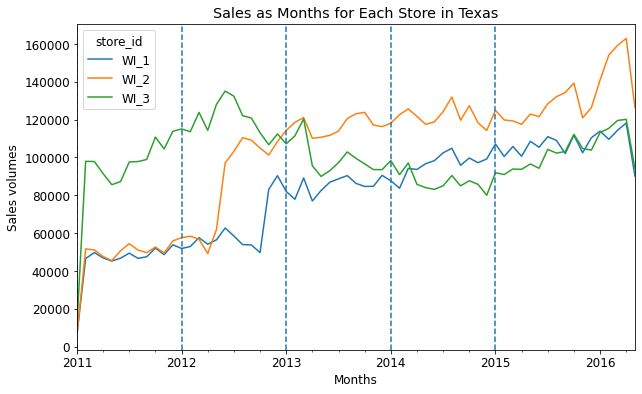

In [73]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales[['WI_1','WI_2','WI_3']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store in Texas')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

<AxesSubplot:title={'center':'Events Type (%)'}, xlabel='Days with Events (%)'>

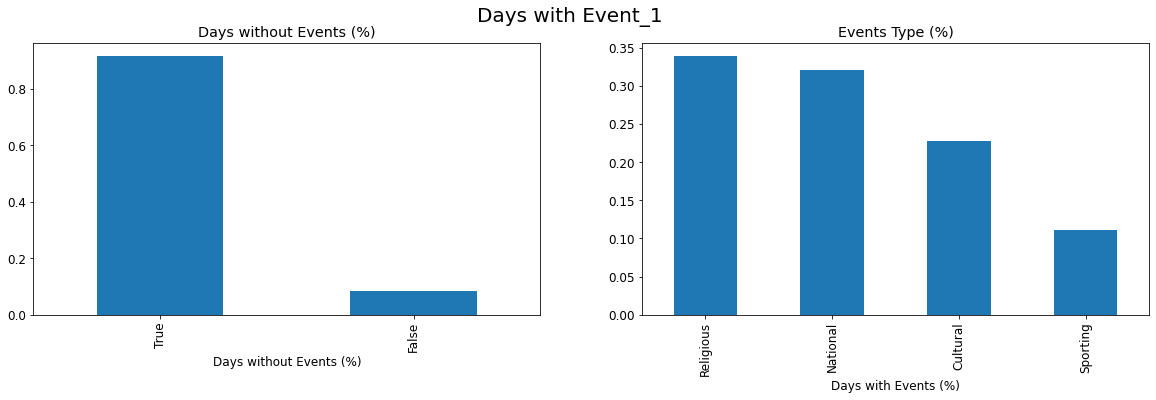

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Days with Event_1 ", fontsize=20)

calendar["event_name_1"].isnull().value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days without Events (%)", ax=ax1, title="Days without Events (%)")

calendar["event_type_1"].value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days with Events (%)", ax=ax2, title="Events Type (%)")

<AxesSubplot:title={'center':'Events Names'}, xlabel='Event Name'>

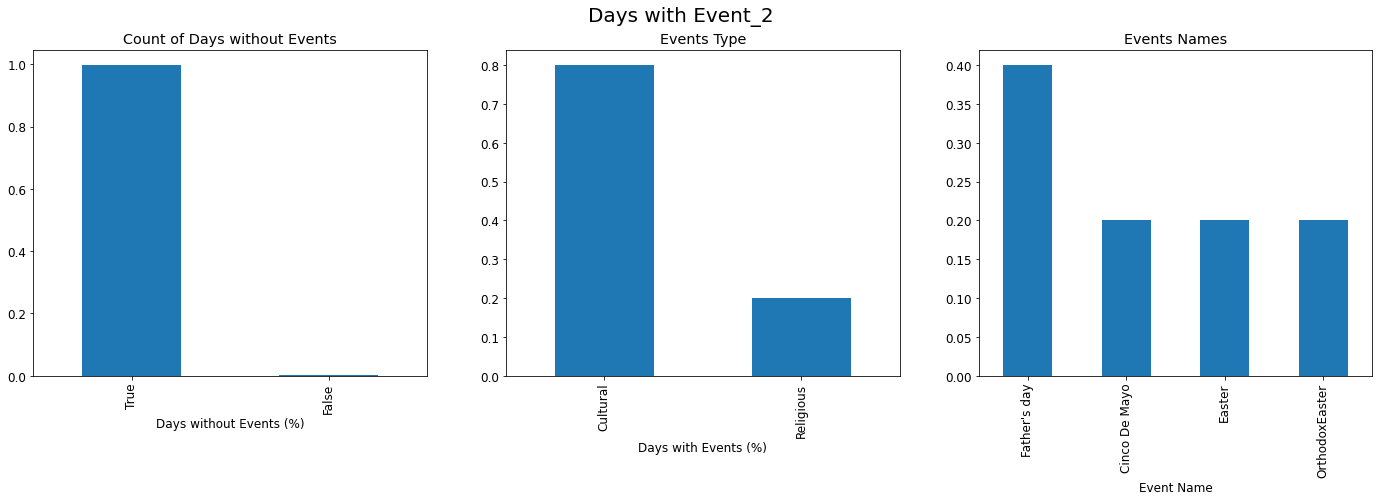

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
fig.suptitle("Days with Event_2", fontsize=20)

calendar["event_name_2"].isnull().value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days without Events (%)", ax=ax1, title="Count of Days without Events")

calendar["event_type_2"].value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days with Events (%)", ax=ax2, title="Events Type")

calendar["event_name_2"].value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Event Name", ax=ax3, title="Events Names")

In [151]:
hobbies_1=my_data[my_data['dept_id']=="HOBBIES_1"]
hobbies_1

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
1,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
2,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
3,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,True,True,False,NaN
4,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,True,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54070432,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1937,0,2016-05-18,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070433,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1938,0,2016-05-19,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070434,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1939,0,2016-05-20,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070435,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1940,1,2016-05-21,11617,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77


In [152]:
hobbies_1 = hobbies_1.drop(hobbies_1[hobbies_1['unit_sale'] == 0].index)
hobbies_1

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
901,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_902,1,2013-07-18,11325,...,7,2013,NaN,NaN,NaN,NaN,False,False,False,9.58
916,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_917,2,2013-08-02,11327,...,8,2013,NaN,NaN,NaN,NaN,True,False,True,8.26
918,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_919,1,2013-08-04,11328,...,8,2013,NaN,NaN,NaN,NaN,True,False,False,8.26
919,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_920,1,2013-08-05,11328,...,8,2013,NaN,NaN,NaN,NaN,True,True,True,8.26
925,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_926,1,2013-08-11,11329,...,8,2013,NaN,NaN,NaN,NaN,False,True,True,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54070406,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1911,2,2016-04-22,11612,...,4,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070407,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1912,3,2016-04-23,11613,...,4,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070411,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1916,1,2016-04-27,11613,...,4,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070419,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1924,1,2016-05-05,11614,...,5,2016,Cinco De Mayo,Cultural,NaN,NaN,True,True,True,1.77


In [172]:
h1_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = hobbies_1.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        hobbies_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        hobbies_1_df = hobbies_1_df.dropna()

        h1_df = h1_df.append(hobbies_1_df, ignore_index=True)

h1_df['price_change'] = h1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
h1_df['sale_change'] = h1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
h1_df['elasticity'] = -h1_df['sale_change'] / h1_df['price_change']

h1_df = h1_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3056834730.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h1_df = h1_df.append(hobbies_1_df, ignore_index=True)


In [173]:
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-0.137787,0.503817,3.656489
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,0.014528,0.057512,-3.958726
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-0.137787,-0.240938,-1.748627
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,0.043583,-0.17191,3.944386
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-0.027842,0.048951,1.75816
...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-0.096045,-0.166099,-1.729388
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-0.1875,1.794118,9.568625
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,0.261538,-0.587597,2.246694
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-0.073446,-0.084514,-1.150692


In [160]:
# h1_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in hobbies_1['item_id'].unique():
#     entry_df = hobbies_1[hobbies_1['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
                

#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 hobbies_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 hobbies_1_df = hobbies_1_df.dropna()

#                 h1_df = h1_df.append(hobbies_1_df, ignore_index=True)

#                 h1_df['price_change'] = h1_df['price'].pct_change()*100
#                 h1_df['sale_change'] = h1_df['sale_perday'].pct_change()*100
#                 h1_df['elasticity'] = -h1_df['sale_change']/h1_df['price_change'] 
# h1_df=h1_df.dropna()

In [174]:
level_values = []


for elasticity in h1_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


h1_df['level'] = level_values
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-0.137787,0.503817,3.656489,Elastic Demand
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,0.014528,0.057512,-3.958726,Elastic Demand
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-0.137787,-0.240938,-1.748627,Elastic Demand
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,0.043583,-0.17191,3.944386,Elastic Demand
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-0.027842,0.048951,1.75816,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-0.096045,-0.166099,-1.729388,Elastic Demand
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-0.1875,1.794118,9.568625,Elastic Demand
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,0.261538,-0.587597,2.246694,Elastic Demand
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-0.073446,-0.084514,-1.150692,Elastic Demand


In [175]:
h1_df[h1_df['price_change'] ==h1_df['price_change'].max()]

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
7730,HOBBIES_1_338,HOBBIES_1,HOBBIES,WI,8.88,2013,1.466667,887.000031,0.466667,-0.000526,Inelastic Demand


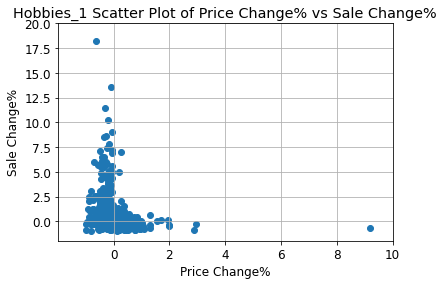

In [189]:
plt.scatter(h1_df['price_change'], h1_df['sale_change'])

plt.title('Hobbies_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.xlim(h1_df['price_change'].min()-1, 10)
plt.ylim(h1_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

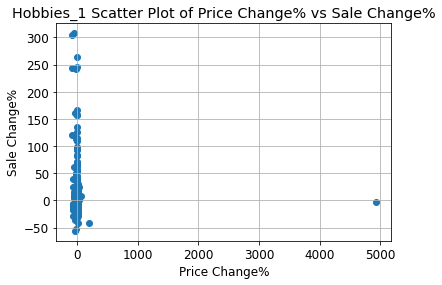

In [162]:
Vis_h1 = pd.DataFrame()

for item_id in h1_df['item_id'].unique():
    entry_df = h1_df[h1_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_h1 = Vis_h1.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_h1['price_change'], Vis_h1['sale_change'])

plt.title('Hobbies_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

In [163]:
h1_df["revenue"] = h1_df["price"]*h1_df["sale_perday"]
h1_df["LB_price"] = h1_df["price"] - (0.5*h1_df["price"])
h1_df["UB_price"] = h1_df["price"] + (0.5*h1_df["price"])
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-13.778703,50.381679,3.656489,Elastic Demand,12.421527,4.13,12.39
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,1.452783,5.75117,-3.958726,Elastic Demand,14.427423,4.19,12.57
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-13.778703,-24.093817,-1.748627,Elastic Demand,10.972239,4.13,12.39
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,4.358349,-17.191011,3.944386,Elastic Demand,9.482,4.31,12.93
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-2.78422,4.895105,1.75816,Elastic Demand,9.669231,4.19,12.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-9.604517,-16.609933,-1.729388,Elastic Demand,2.863158,0.8,2.4
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-18.750004,179.411765,9.568625,Elastic Demand,6.5,0.65,1.95
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,26.15385,-58.75969,2.246694,Elastic Demand,3.381705,0.82,2.46
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-7.344633,-8.45141,-1.150692,Elastic Demand,3.744337,0.82,2.46


In [164]:
import pandas as pd
from scipy.optimize import minimize

# Assuming h1_df is your DataFrame
# Define the objective function to be minimized
def objective(opti_price, row):
    # Calculate optimized units and revenue for the current row
    optimized_units = row["sale_perday"] + (row["sale_perday"]*((opti_price/row["price"]) - 1)*(row["elasticity"]))
    optimized_revenue = optimized_units * opti_price
    return -sum(optimized_revenue)

In [165]:
for index, row in h1_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    h1_df.at[index, "opti_price"] = result.x
    h1_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    h1_df.at[index, "optimized_revenue"] = h1_df.at[index, "optimized_units"] * result.x


In [166]:
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-13.778703,50.381679,3.656489,Elastic Demand,12.421527,4.13,12.39,12.390000,4.253162,52.696677
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,1.452783,5.75117,-3.958726,Elastic Demand,14.427423,4.19,12.57,5.248421,4.268594,22.403380
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-13.778703,-24.093817,-1.748627,Elastic Demand,10.972239,4.13,12.39,6.491853,1.825581,11.851402
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,4.358349,-17.191011,3.944386,Elastic Demand,9.482,4.31,12.93,12.930000,3.269412,42.273500
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-2.78422,4.895105,1.75816,Elastic Demand,9.669231,4.19,12.57,12.570000,2.168169,27.253889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-9.604517,-16.609933,-1.729388,Elastic Demand,2.863158,0.8,2.4,1.262592,2.442084,3.083354
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-18.750004,179.411765,9.568625,Elastic Demand,6.5,0.65,1.95,1.950000,28.921563,56.397046
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,26.15385,-58.75969,2.246694,Elastic Demand,3.381705,0.82,2.46,2.460000,4.378374,10.770800
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-7.344633,-8.45141,-1.150692,Elastic Demand,3.744337,0.82,2.46,1.532615,2.455157,3.762810


In [190]:
hobbies_2=my_data[my_data['dept_id']=="HOBBIES_2"]
hobbies_2 = hobbies_2.drop(hobbies_2[hobbies_2['unit_sale'] == 0].index)

In [192]:
h2_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = hobbies_2.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        hobbies_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        hobbies_2_df = hobbies_2_df.dropna()

        h2_df = h2_df.append(hobbies_2_df, ignore_index=True)

h2_df['price_change'] = h2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
h2_df['sale_change'] = h2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
h2_df['elasticity'] = -h2_df['sale_change'] / h2_df['price_change']

h2_df = h2_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\1342398043.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h2_df = h2_df.append(hobbies_2_df, ignore_index=True)


In [ ]:
# hobbies_2=my_data[my_data['dept_id']=="HOBBIES_2"]
# hobbies_2 = hobbies_2.drop(hobbies_2[hobbies_2['unit_sale'] == 0].index)

# h2_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in hobbies_2['item_id'].unique():
#     entry_df = hobbies_2[hobbies_2['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 hobbies_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 hobbies_2_df = hobbies_2_df.dropna()
                
#                 h2_df = h2_df.append(hobbies_2_df, ignore_index=True)

#                 h2_df['price_change'] = h2_df['price'].pct_change()*100
#                 h2_df['sale_change'] = h2_df['sale_perday'].pct_change()*100
#                 h2_df['elasticity'] = -h2_df['sale_change']/h2_df['price_change'] 
# h2_df=h2_df.dropna()
# h2_df

C:\Users\hp\AppData\Local\Temp\ipykernel_31116\3505307838.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h2_df = h2_df.append(hobbies_2_df, ignore_index=True)


,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity
1,HOBBIES_2_001,HOBBIES_2,HOBBIES,5.67,1.111111,3.656313,1.626016,-0.444715
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,5.97,1.144351,5.291000,2.991632,-0.565419
3,HOBBIES_2_001,HOBBIES_2,HOBBIES,4.47,1.0,-25.125629,-12.614260,-0.502048
4,HOBBIES_2_001,HOBBIES_2,HOBBIES,2.97,1.0,-33.557043,0.000000,0.000000
5,HOBBIES_2_002,HOBBIES_2,HOBBIES,1.97,1.38148,-33.670033,38.147962,1.132994
...,...,...,...,...,...,...,...,...
444,HOBBIES_2_148,HOBBIES_2,HOBBIES,0.97,1.358974,10.227277,-10.974973,1.073108
445,HOBBIES_2_148,HOBBIES_2,HOBBIES,1.17,1.136364,20.618549,-16.380789,0.794469
446,HOBBIES_2_149,HOBBIES_2,HOBBIES,2.47,1.325203,111.111121,16.617886,-0.149561
447,HOBBIES_2_149,HOBBIES_2,HOBBIES,0.97,1.68231,-60.728744,26.947354,0.443733


In [193]:
level_values = []


for elasticity in h2_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


h2_df['level'] = level_values
h2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.97,2012,1.156863,0.05291,0.028322,-0.535295,Inelastic Demand
5,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.47,2014,1.1,-0.083752,0.038889,0.464333,Inelastic Demand
7,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,4.47,2015,1.0,-0.182815,-0.12,-0.6564,Inelastic Demand
10,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,2.97,2011,1.0,-0.457038,-0.09589,-0.209808,Inelastic Demand
11,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,5.67,2011,1.111111,0.909091,0.111111,-0.122222,Inelastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
2845,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI,0.88,2013,1.441558,0.142857,0.190853,-1.335968,Elastic Demand
2851,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA,0.97,2014,1.571429,-0.607287,0.136778,0.225228,Inelastic Demand
2856,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.97,2014,1.664122,-0.607287,0.109415,0.18017,Inelastic Demand
2858,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.5,2015,1.0,-0.484536,-0.450549,-0.929857,Inelastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4172586412.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h2 = Vis_h2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4172586412.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h2 = Vis_h2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4172586412.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h2 = Vis_h2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4172586412.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h2 = Vis_h2.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

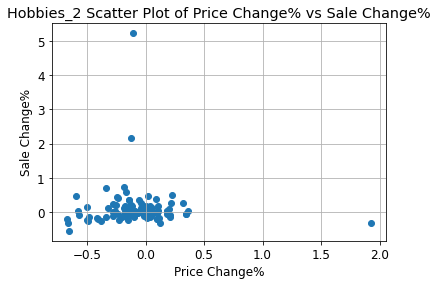

In [194]:
# Vis_h2 = pd.DataFrame()

# for item_id in h2_df['item_id'].unique():
#     entry_df = h2_df[h2_df['item_id'] == item_id]
    
#     price_change = entry_df["price_change"].mean()
#     sale_change = entry_df["sale_change"].mean()
#     elasticity = entry_df["elasticity"].mean()
    
#     Vis_h2 = Vis_h2.append({'item_id': item_id,
#                     'price_change': price_change,
#                     'sale_change': sale_change,
#                     'elasticity': elasticity},ignore_index=True)

# #V1   
# plt.scatter(Vis_h2['price_change'], Vis_h2['sale_change'])

# plt.title('Hobbies_2 Scatter Plot of Price Change% vs Sale Change%')
# plt.xlabel('Price Change%')
# plt.ylabel('Sale Change%')
# plt.grid(True)

# plt.show()

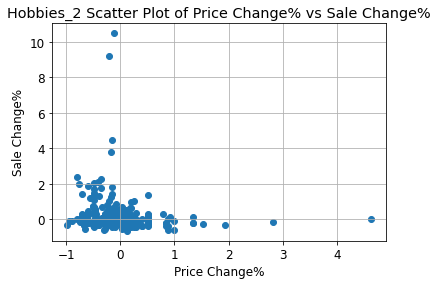

In [198]:
plt.scatter(h2_df['price_change'], h2_df['sale_change'])

plt.title('Hobbies_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(h2_df['price_change'].min()-1, 10)
# plt.ylim(h2_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [199]:
h2_df["revenue"] = h2_df["price"]*h2_df["sale_perday"]
h2_df["LB_price"] = h2_df["price"] - (0.5*h2_df["price"])
h2_df["UB_price"] = h2_df["price"] + (0.5*h2_df["price"])
h2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.97,2012,1.156863,0.05291,0.028322,-0.535295,Inelastic Demand,6.90647,2.985,8.955
5,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.47,2014,1.1,-0.083752,0.038889,0.464333,Inelastic Demand,6.017,2.735,8.205
7,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,4.47,2015,1.0,-0.182815,-0.12,-0.6564,Inelastic Demand,4.47,2.235,6.705
10,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,2.97,2011,1.0,-0.457038,-0.09589,-0.209808,Inelastic Demand,2.97,1.485,4.455
11,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,5.67,2011,1.111111,0.909091,0.111111,-0.122222,Inelastic Demand,6.3,2.835,8.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI,0.88,2013,1.441558,0.142857,0.190853,-1.335968,Elastic Demand,1.268571,0.44,1.32
2851,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA,0.97,2014,1.571429,-0.607287,0.136778,0.225228,Inelastic Demand,1.524286,0.485,1.455
2856,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.97,2014,1.664122,-0.607287,0.109415,0.18017,Inelastic Demand,1.614199,0.485,1.455
2858,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.5,2015,1.0,-0.484536,-0.450549,-0.929857,Inelastic Demand,0.5,0.25,0.75


In [200]:
for index, row in h2_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    h2_df.at[index, "opti_price"] = result.x
    h2_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    h2_df.at[index, "optimized_revenue"] = h2_df.at[index, "optimized_units"] * result.x

In [201]:
h2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.97,2012,1.156863,0.05291,0.028322,-0.535295,Inelastic Demand,6.90647,2.985,8.955,8.561368,0.888063,7.603031
5,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.47,2014,1.1,-0.083752,0.038889,0.464333,Inelastic Demand,6.017,2.735,8.205,8.205000,1.355383,11.120920
7,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,4.47,2015,1.0,-0.182815,-0.12,-0.6564,Inelastic Demand,4.47,2.235,6.705,5.639937,0.828200,4.670995
10,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,2.97,2011,1.0,-0.457038,-0.09589,-0.209808,Inelastic Demand,2.97,1.485,4.455,4.455000,0.895096,3.987652
11,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,5.67,2011,1.111111,0.909091,0.111111,-0.122222,Inelastic Demand,6.3,2.835,8.505,8.505000,1.043210,8.872500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI,0.88,2013,1.441558,0.142857,0.190853,-1.335968,Elastic Demand,1.268571,0.44,1.32,0.769349,1.683717,1.295367
2851,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA,0.97,2014,1.571429,-0.607287,0.136778,0.225228,Inelastic Demand,1.524286,0.485,1.455,1.455000,1.748393,2.543912
2856,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.97,2014,1.664122,-0.607287,0.109415,0.18017,Inelastic Demand,1.614199,0.485,1.455,1.455000,1.814034,2.639420
2858,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.5,2015,1.0,-0.484536,-0.450549,-0.929857,Inelastic Demand,0.5,0.25,0.75,0.518858,0.964929,0.500661


In [202]:
food_1=my_data[my_data['dept_id']=="FOODS_1"]
food_1 = food_1.drop(food_1[food_1['unit_sale'] == 0].index)

In [203]:
f1_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = food_1.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        foods_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        foods_1_df = foods_1_df.dropna()

        f1_df = f1_df.append(foods_1_df, ignore_index=True)

f1_df['price_change'] = f1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
f1_df['sale_change'] = f1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
f1_df['elasticity'] = -f1_df['sale_change'] / f1_df['price_change']

f1_df = f1_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3941913805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1_df = f1_df.append(foods_1_df, ignore_index=True)


In [ ]:


# f1_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in food_1['item_id'].unique():
#     entry_df = food_1[food_1['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 food_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 food_1_df = food_1_df.dropna()
                
#                 f1_df = f1_df.append(food_1_df, ignore_index=True)

#                 f1_df['price_change'] = f1_df['price'].pct_change()*100
#                 f1_df['sale_change'] = f1_df['sale_perday'].pct_change()*100
#                 f1_df['elasticity'] = -f1_df['sale_change']/f1_df['price_change'] 
# f1_df=f1_df.dropna()
# f1_df

C:\Users\hp\AppData\Local\Temp\ipykernel_31116\1183101320.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1_df = f1_df.append(food_1_df, ignore_index=True)


,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity
1,FOODS_1_001,FOODS_1,FOODS,2.24,1.765435,12.000000,-9.208288,0.767357
2,FOODS_1_001,FOODS_1,FOODS,1.75,2.0,-21.875000,13.286528,0.607384
3,FOODS_1_001,FOODS_1,FOODS,1.19,5.0,-31.999997,150.000000,4.687500
4,FOODS_1_001,FOODS_1,FOODS,1.0,7.0,-15.966391,40.000000,2.505263
5,FOODS_1_001,FOODS_1,FOODS,1.99,1.0,99.000001,-85.714286,0.865801
...,...,...,...,...,...,...,...,...
1991,FOODS_1_219,FOODS_1,FOODS,2.24,3.465771,28.000001,-24.402010,0.871500
1992,FOODS_1_219,FOODS_1,FOODS,1.98,1.5,-11.607142,-56.719585,-4.886611
1993,FOODS_1_219,FOODS_1,FOODS,1.19,6.666667,-39.898988,344.444444,8.632912
1994,FOODS_1_219,FOODS_1,FOODS,1.0,18.111111,-15.966391,171.666667,10.751752


In [204]:
level_values = []


for elasticity in f1_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


f1_df['level'] = level_values
f1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,FOODS_1_001,FOODS_1,FOODS,CA,1.75,2011,1.0,-0.125,-0.561806,-4.494449,Elastic Demand
3,FOODS_1_001,FOODS_1,FOODS,CA,2.24,2012,2.029963,0.12,-0.106366,0.886387,Inelastic Demand
5,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2013,2.25,-0.107143,0.176279,1.645271,Elastic Demand
7,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2014,1.5,-0.107143,-0.277828,-2.593062,Elastic Demand
12,FOODS_1_001,FOODS_1,FOODS,TX,1.19,2012,5.0,-0.405,1.857143,4.585538,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
6118,FOODS_1_219,FOODS_1,FOODS,TX,1.19,2013,9.5,0.19,1.375,-7.23684,Elastic Demand
6123,FOODS_1_219,FOODS_1,FOODS,WI,2.18,2011,4.705882,0.09,0.065515,-0.727941,Inelastic Demand
6124,FOODS_1_219,FOODS_1,FOODS,WI,1.75,2011,4.637931,-0.197248,-0.01444,-0.073206,Inelastic Demand
6125,FOODS_1_219,FOODS_1,FOODS,WI,2.24,2011,2.461538,0.28,-0.469259,1.675926,Elastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

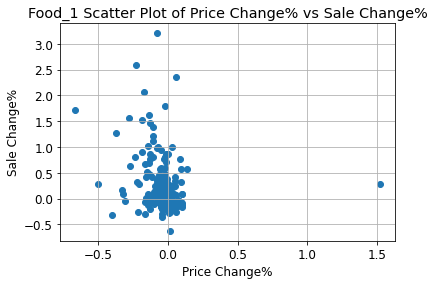

In [205]:
Vis_f1 = pd.DataFrame()

for item_id in f1_df['item_id'].unique():
    entry_df = f1_df[f1_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_f1 = Vis_f1.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_f1['price_change'], Vis_f1['sale_change'])

plt.title('Food_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

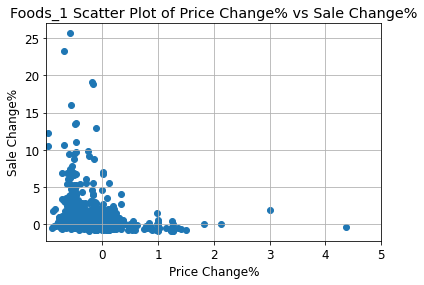

In [209]:
plt.scatter(f1_df['price_change'], f1_df['sale_change'])

plt.title('Foods_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.xlim(f1_df['price_change'].min(), 5)
# plt.ylim(h1_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [211]:
f1_df["revenue"] = f1_df["price"]*f1_df["sale_perday"]
f1_df["LB_price"] = f1_df["price"] - (0.5*f1_df["price"])
f1_df["UB_price"] = f1_df["price"] + (0.5*f1_df["price"])
f1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,FOODS_1_001,FOODS_1,FOODS,CA,1.75,2011,1.0,-0.125,-0.561806,-4.494449,Elastic Demand,1.75,0.875,2.625
3,FOODS_1_001,FOODS_1,FOODS,CA,2.24,2012,2.029963,0.12,-0.106366,0.886387,Inelastic Demand,4.547116,1.12,3.36
5,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2013,2.25,-0.107143,0.176279,1.645271,Elastic Demand,4.5,1.0,3.0
7,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2014,1.5,-0.107143,-0.277828,-2.593062,Elastic Demand,3.0,1.0,3.0
12,FOODS_1_001,FOODS_1,FOODS,TX,1.19,2012,5.0,-0.405,1.857143,4.585538,Elastic Demand,5.95,0.595,1.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,FOODS_1_219,FOODS_1,FOODS,TX,1.19,2013,9.5,0.19,1.375,-7.23684,Elastic Demand,11.305001,0.595,1.785
6123,FOODS_1_219,FOODS_1,FOODS,WI,2.18,2011,4.705882,0.09,0.065515,-0.727941,Inelastic Demand,10.258824,1.09,3.27
6124,FOODS_1_219,FOODS_1,FOODS,WI,1.75,2011,4.637931,-0.197248,-0.01444,-0.073206,Inelastic Demand,8.116379,0.875,2.625
6125,FOODS_1_219,FOODS_1,FOODS,WI,2.24,2011,2.461538,0.28,-0.469259,1.675926,Elastic Demand,5.513846,1.12,3.36


In [212]:
for index, row in f1_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    f1_df.at[index, "opti_price"] = result.x
    f1_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    f1_df.at[index, "optimized_revenue"] = f1_df.at[index, "optimized_units"] * result.x

In [213]:
f1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_1_001,FOODS_1,FOODS,CA,1.75,2011,1.0,-0.125,-0.561806,-4.494449,Elastic Demand,1.75,0.875,2.625,1.069685,2.747224,2.938664
3,FOODS_1_001,FOODS_1,FOODS,CA,2.24,2012,2.029963,0.12,-0.106366,0.886387,Inelastic Demand,4.547116,1.12,3.36,3.360000,2.929629,9.843553
5,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2013,2.25,-0.107143,0.176279,1.645271,Elastic Demand,4.5,1.0,3.0,3.000000,4.100930,12.302791
7,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2014,1.5,-0.107143,-0.277828,-2.593062,Elastic Demand,3.0,1.0,3.0,1.385644,2.694796,3.734030
12,FOODS_1_001,FOODS_1,FOODS,TX,1.19,2012,5.0,-0.405,1.857143,4.585538,Elastic Demand,5.95,0.595,1.785,1.785000,16.463846,29.387966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,FOODS_1_219,FOODS_1,FOODS,TX,1.19,2013,9.5,0.19,1.375,-7.23684,Elastic Demand,11.305001,0.595,1.785,0.677218,39.124990,26.496157
6123,FOODS_1_219,FOODS_1,FOODS,WI,2.18,2011,4.705882,0.09,0.065515,-0.727941,Inelastic Demand,10.258824,1.09,3.27,2.587373,4.065745,10.519599
6124,FOODS_1_219,FOODS_1,FOODS,WI,1.75,2011,4.637931,-0.197248,-0.01444,-0.073206,Inelastic Demand,8.116379,0.875,2.625,2.625000,4.468170,11.728945
6125,FOODS_1_219,FOODS_1,FOODS,WI,2.24,2011,2.461538,0.28,-0.469259,1.675926,Elastic Demand,5.513846,1.12,3.36,3.360000,4.524217,15.201369


In [214]:
food_2=my_data[my_data['dept_id']=="FOODS_2"]
food_2 = food_2.drop(food_2[food_2['unit_sale'] == 0].index)

In [215]:
f2_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = food_2.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        foods_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        foods_2_df = foods_2_df.dropna()

        f2_df = f2_df.append(foods_2_df, ignore_index=True)

f2_df['price_change'] = f2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
f2_df['sale_change'] = f2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
f2_df['elasticity'] = -f2_df['sale_change'] / f2_df['price_change']

f2_df = f2_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2715198107.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f2_df = f2_df.append(foods_2_df, ignore_index=True)


In [ ]:
# food_2=my_data[my_data['dept_id']=="FOODS_2"]
# food_2 = food_2.drop(food_2[food_2['unit_sale'] == 0].index)

# f2_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in food_2['item_id'].unique():
#     entry_df = food_2[food_2['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 food_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 food_2_df = food_2_df.dropna()
                
#                 f2_df = f2_df.append(food_2_df, ignore_index=True)

#                 f2_df['price_change'] = f2_df['price'].pct_change()*100
#                 f2_df['sale_change'] = f2_df['sale_perday'].pct_change()*100
#                 f2_df['elasticity'] = -f2_df['sale_change']/f2_df['price_change'] 
# f2_df=f2_df.dropna()
# f2_df

C:\Users\hp\AppData\Local\Temp\ipykernel_31116\3288655734.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f2_df = f2_df.append(food_2_df, ignore_index=True)


,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity
1,FOODS_2_001,FOODS_2,FOODS,1.97,2.194175,-17.226894,46.278317,2.686399
2,FOODS_2_001,FOODS_2,FOODS,2.0,2.010111,1.522841,-8.388765,5.508628
3,FOODS_2_001,FOODS_2,FOODS,2.28,1.2,13.999999,-40.301792,2.878700
4,FOODS_2_001,FOODS_2,FOODS,1.66,2.333333,-27.192983,94.444444,3.473118
5,FOODS_2_001,FOODS_2,FOODS,1.76,1.794118,6.024098,-23.109244,3.836133
...,...,...,...,...,...,...,...,...
3370,FOODS_2_399,FOODS_2,FOODS,1.88,2.678384,88.000000,60.703043,-0.689807
3371,FOODS_2_399,FOODS_2,FOODS,0.99,2.0,-47.340425,-25.328110,-0.535021
3372,FOODS_2_399,FOODS_2,FOODS,1.8,2.013158,81.818175,0.657895,-0.008041
3373,FOODS_2_399,FOODS_2,FOODS,0.89,8.0,-50.555555,297.385621,5.882353


In [216]:
level_values = []


for elasticity in f2_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


f2_df['level'] = level_values
f2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,FOODS_2_001,FOODS_2,FOODS,CA,1.97,2011,1.87037,-0.172269,0.246914,1.433303,Elastic Demand
2,FOODS_2_001,FOODS_2,FOODS,CA,2.28,2011,1.2,0.15736,-0.358416,2.277675,Elastic Demand
8,FOODS_2_001,FOODS_2,FOODS,TX,1.76,2011,1.851852,0.060241,-0.206349,3.425396,Elastic Demand
9,FOODS_2_001,FOODS_2,FOODS,TX,1.82,2011,2.259259,0.034091,0.22,-6.453327,Elastic Demand
11,FOODS_2_001,FOODS_2,FOODS,TX,2.0,2012,1.811456,0.136364,0.096253,-0.705857,Inelastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
12056,FOODS_2_399,FOODS_2,FOODS,WI,2.1,2014,2.0,0.05,-0.032086,0.641712,Inelastic Demand
12057,FOODS_2_399,FOODS_2,FOODS,WI,2.14,2014,1.835616,0.019048,-0.082192,4.315047,Elastic Demand
12058,FOODS_2_399,FOODS_2,FOODS,WI,2.08,2014,1.933333,-0.028037,0.053234,1.898668,Elastic Demand
12060,FOODS_2_399,FOODS_2,FOODS,WI,2.0,2015,2.552764,-0.038462,-0.021121,-0.549137,Inelastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

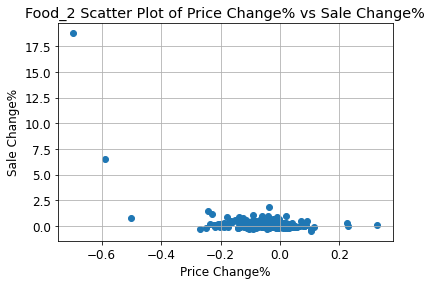

In [217]:
Vis_f2 = pd.DataFrame()

for item_id in f2_df['item_id'].unique():
    entry_df = f2_df[f2_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_f2 = Vis_f2.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_f2['price_change'], Vis_f2['sale_change'])

plt.title('Food_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

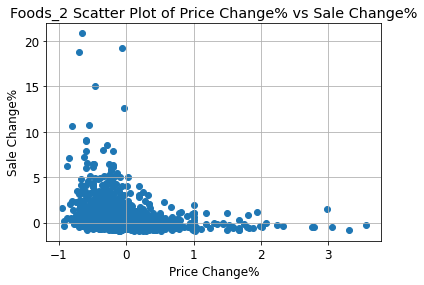

In [218]:
plt.scatter(f2_df['price_change'], f2_df['sale_change'])

plt.title('Foods_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(f2_df['price_change'].min(), 5)
# plt.ylim(f2_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [219]:
f2_df["revenue"] = f2_df["price"]*f2_df["sale_perday"]
f2_df["LB_price"] = f2_df["price"] - (0.5*f2_df["price"])
f2_df["UB_price"] = f2_df["price"] + (0.5*f2_df["price"])
f2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,FOODS_2_001,FOODS_2,FOODS,CA,1.97,2011,1.87037,-0.172269,0.246914,1.433303,Elastic Demand,3.68463,0.985,2.955
2,FOODS_2_001,FOODS_2,FOODS,CA,2.28,2011,1.2,0.15736,-0.358416,2.277675,Elastic Demand,2.736,1.14,3.42
8,FOODS_2_001,FOODS_2,FOODS,TX,1.76,2011,1.851852,0.060241,-0.206349,3.425396,Elastic Demand,3.259259,0.88,2.64
9,FOODS_2_001,FOODS_2,FOODS,TX,1.82,2011,2.259259,0.034091,0.22,-6.453327,Elastic Demand,4.111852,0.91,2.73
11,FOODS_2_001,FOODS_2,FOODS,TX,2.0,2012,1.811456,0.136364,0.096253,-0.705857,Inelastic Demand,3.622912,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,FOODS_2_399,FOODS_2,FOODS,WI,2.1,2014,2.0,0.05,-0.032086,0.641712,Inelastic Demand,4.2,1.05,3.15
12057,FOODS_2_399,FOODS_2,FOODS,WI,2.14,2014,1.835616,0.019048,-0.082192,4.315047,Elastic Demand,3.928219,1.07,3.21
12058,FOODS_2_399,FOODS_2,FOODS,WI,2.08,2014,1.933333,-0.028037,0.053234,1.898668,Elastic Demand,4.021333,1.04,3.12
12060,FOODS_2_399,FOODS_2,FOODS,WI,2.0,2015,2.552764,-0.038462,-0.021121,-0.549137,Inelastic Demand,5.105528,1.0,3.0


In [220]:
for index, row in f2_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    f2_df.at[index, "opti_price"] = result.x
    f2_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    f2_df.at[index, "optimized_revenue"] = f2_df.at[index, "optimized_units"] * result.x

In [221]:
f2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_2_001,FOODS_2,FOODS,CA,1.97,2011,1.87037,-0.172269,0.246914,1.433303,Elastic Demand,3.68463,0.985,2.955,2.955000,3.210774,9.487838
2,FOODS_2_001,FOODS_2,FOODS,CA,2.28,2011,1.2,0.15736,-0.358416,2.277675,Elastic Demand,2.736,1.14,3.42,3.420000,2.566605,8.777790
8,FOODS_2_001,FOODS_2,FOODS,TX,1.76,2011,1.851852,0.060241,-0.206349,3.425396,Elastic Demand,3.259259,0.88,2.64,2.640000,5.023515,13.262079
9,FOODS_2_001,FOODS_2,FOODS,TX,1.82,2011,2.259259,0.034091,0.22,-6.453327,Elastic Demand,4.111852,0.91,2.73,1.051013,8.419499,8.848999
11,FOODS_2_001,FOODS_2,FOODS,TX,2.0,2012,1.811456,0.136364,0.096253,-0.705857,Inelastic Demand,3.622912,1.0,3.0,2.416718,1.545042,3.733931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,FOODS_2_399,FOODS_2,FOODS,WI,2.1,2014,2.0,0.05,-0.032086,0.641712,Inelastic Demand,4.2,1.05,3.15,3.150000,2.641712,8.321392
12057,FOODS_2_399,FOODS_2,FOODS,WI,2.14,2014,1.835616,0.019048,-0.082192,4.315047,Elastic Demand,3.928219,1.07,3.21,3.210000,5.796002,18.605167
12058,FOODS_2_399,FOODS_2,FOODS,WI,2.08,2014,1.933333,-0.028037,0.053234,1.898668,Elastic Demand,4.021333,1.04,3.12,3.120000,3.768712,11.758381
12060,FOODS_2_399,FOODS_2,FOODS,WI,2.0,2015,2.552764,-0.038462,-0.021121,-0.549137,Inelastic Demand,5.105528,1.0,3.0,2.821039,1.977291,5.578013


In [222]:
food_3=my_data[my_data['dept_id']=="FOODS_3"]
food_3 = food_3.drop(food_3[food_3['unit_sale'] == 0].index)

In [223]:
f3_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = food_3.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        foods_3_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        foods_3_df = foods_3_df.dropna()

        f3_df = f3_df.append(foods_3_df, ignore_index=True)

f3_df['price_change'] = f3_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
f3_df['sale_change'] = f3_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
f3_df['elasticity'] = -f3_df['sale_change'] / f3_df['price_change']

f3_df = f3_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2030387177.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f3_df = f3_df.append(foods_3_df, ignore_index=True)


In [ ]:
# food_3=my_data[my_data['dept_id']=="FOODS_3"]
# food_3 = food_3.drop(food_3[food_3['unit_sale'] == 0].index)

# f3_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in food_3['item_id'].unique():
#     entry_df = food_3[food_3['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 food_3_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 food_3_df = food_3_df.dropna()
                
#                 f3_df = f3_df.append(food_3_df, ignore_index=True)

#                 f3_df['price_change'] = f3_df['price'].pct_change()*100
#                 f3_df['sale_change'] = f3_df['sale_perday'].pct_change()*100
#                 f3_df['elasticity'] = -f3_df['sale_change']/f3_df['price_change'] 
# f3_df=f3_df.dropna()
# f3_df

C:\Users\hp\AppData\Local\Temp\ipykernel_31116\2647534762.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f3_df = f3_df.append(food_3_df, ignore_index=True)


,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity
1,FOODS_3_001,FOODS_3,FOODS,2.5,1.877929,9.649124,0.527581,-0.054677
2,FOODS_3_001,FOODS_3,FOODS,2.0,2.0,-20.000000,6.500271,0.325014
3,FOODS_3_001,FOODS_3,FOODS,1.98,1.25,-0.999999,-37.500000,-37.500036
4,FOODS_3_001,FOODS_3,FOODS,1.25,10.0,-36.868687,700.000000,18.986301
5,FOODS_3_001,FOODS_3,FOODS,1.0,5.833333,-20.000000,-41.666667,-2.083333
...,...,...,...,...,...,...,...,...
4513,FOODS_3_825,FOODS_3,FOODS,1.99,1.0,-20.080321,0.000000,0.000000
4514,FOODS_3_826,FOODS_3,FOODS,1.28,2.113901,-35.678394,111.390059,3.122059
4515,FOODS_3_826,FOODS_3,FOODS,1.0,2.0,-21.874998,-5.388172,-0.246316
4516,FOODS_3_827,FOODS_3,FOODS,1.0,3.831858,0.000000,91.592920,-inf


In [224]:
level_values = []


for elasticity in f3_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


f3_df['level'] = level_values
f3_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,0.757697,Inelastic Demand
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,0.64486,Inelastic Demand
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,3.620877,Elastic Demand
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,0.39955,Inelastic Demand
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,0.961837,Inelastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

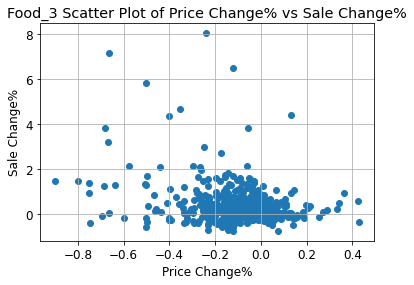

In [225]:
Vis_f3 = pd.DataFrame()

for item_id in f3_df['item_id'].unique():
    entry_df = f3_df[f3_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_f3 = Vis_f3.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_f3['price_change'], Vis_f3['sale_change'])

plt.title('Food_3 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

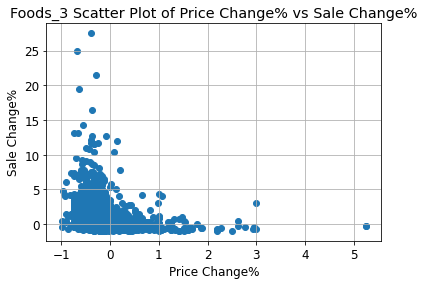

In [226]:
plt.scatter(f3_df['price_change'], f3_df['sale_change'])

plt.title('Foods_3 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(f3_df['price_change'].min(), 5)
# plt.ylim(h3_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [227]:
f3_df["revenue"] = f3_df["price"]*f3_df["sale_perday"]
f3_df["LB_price"] = f3_df["price"] - (0.5*f3_df["price"])
f3_df["UB_price"] = f3_df["price"] + (0.5*f3_df["price"])
f3_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,0.757697,Inelastic Demand,4.4,1.0,3.0
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,0.64486,Inelastic Demand,4.0,1.0,3.0
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,3.620877,Elastic Demand,6.789,2.19,6.57
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,0.39955,Inelastic Demand,6.394098,1.99,5.97
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,0.961837,Inelastic Demand,2.0,0.5,1.5


In [228]:
for index, row in f3_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    f3_df.at[index, "opti_price"] = result.x
    f3_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    f3_df.at[index, "optimized_revenue"] = f3_df.at[index, "optimized_units"] * result.x

In [229]:
f3_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75,2.657479,1.885609,5.010965
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,0.757697,Inelastic Demand,4.4,1.0,3.0,3.000000,3.033467,9.100402
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,0.64486,Inelastic Demand,4.0,1.0,3.0,3.000000,2.644860,7.934579
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97,1.996398,1.487780,2.970200
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97,1.394166,1.724744,2.404580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97,4.029397,1.951850,7.864781
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,3.620877,Elastic Demand,6.789,2.19,6.57,6.570000,4.356180,28.620100
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,0.39955,Inelastic Demand,6.394098,1.99,5.97,5.970000,1.927508,11.507221
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,0.961837,Inelastic Demand,2.0,0.5,1.5,1.500000,2.961837,4.442756


In [230]:
household_1=my_data[my_data['dept_id']=="HOUSEHOLD_1"]
household_1 = household_1.drop(household_1[household_1['unit_sale'] == 0].index)

In [231]:
ho1_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = household_1.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        household_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        household_1_df = household_1_df.dropna()

        ho1_df = ho1_df.append(household_1_df, ignore_index=True)

ho1_df['price_change'] = ho1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
ho1_df['sale_change'] = ho1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
ho1_df['elasticity'] = -ho1_df['sale_change'] / ho1_df['price_change']

f3_df = f3_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2763407023.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho1_df = ho1_df.append(household_1_df, ignore_index=True)


In [ ]:
# household_1=my_data[my_data['dept_id']=="HOUSEHOLD_1"]
# household_1 = household_1.drop(household_1[household_1['unit_sale'] == 0].index)

# ho1_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in household_1['item_id'].unique():
#     entry_df = household_1[household_1['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 household_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 household_1_df = household_1_df.dropna()
                
#                 ho1_df = ho1_df.append(household_1_df, ignore_index=True)

#                 ho1_df['price_change'] = ho1_df['price'].pct_change()*100
#                 ho1_df['sale_change'] = ho1_df['sale_perday'].pct_change()*100
#                 ho1_df['elasticity'] = -ho1_df['sale_change']/ho1_df['price_change'] 
# ho1_df = ho1_df.dropna()
# ho1_df

C:\Users\hp\AppData\Local\Temp\ipykernel_31116\4193658835.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho1_df = ho1_df.append(household_1_df, ignore_index=True)


,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity
1,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,6.27,1.211538,-0.791142,-4.623568,-5.844168
2,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,6.97,1.312821,11.164271,8.359788,-0.748798
3,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,5.97,1.411195,-14.347203,7.493381,0.522289
4,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,4.5,1.4,-24.623113,-0.793310,-0.032218
5,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,5.37,1.25,19.333331,-10.714286,0.554187
...,...,...,...,...,...,...,...,...
2527,HOUSEHOLD_1_540,HOUSEHOLD_1,HOUSEHOLD,1.88,3.573229,14.634147,8.172636,-0.558463
2528,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,7.97,2.922935,323.936160,-18.199052,0.056181
2529,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,7.5,2.707944,-5.897112,-7.355329,-1.247277
2530,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,6.97,2.850942,-7.066669,5.280671,0.747264


In [232]:
level_values = []


for elasticity in ho1_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


ho1_df['level'] = level_values
ho1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
0,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.32,2011,1.3,NaN,NaN,NaN,Inelastic Demand
1,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.27,2011,1.227723,-0.007911,-0.055598,-7.027544,Elastic Demand
2,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.97,2011,1.418699,0.111643,0.155553,-1.393314,Elastic Demand
3,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.97,2012,1.372549,NaN,NaN,NaN,Inelastic Demand
4,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,5.97,2012,1.643599,-0.143472,0.197479,1.376429,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
11581,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,7.5,2013,2.466667,-0.058971,-0.052188,-0.884971,Inelastic Demand
11582,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,7.5,2014,2.4,NaN,NaN,NaN,Inelastic Demand
11583,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,6.97,2014,2.522831,-0.070667,0.05118,0.724239,Inelastic Demand
11584,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,6.97,2015,2.57287,NaN,NaN,NaN,Inelastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppD

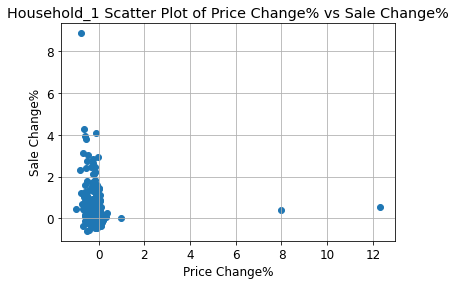

In [233]:
Vis_ho1 = pd.DataFrame()

for item_id in ho1_df['item_id'].unique():
    entry_df = ho1_df[ho1_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_ho1 = Vis_ho1.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_ho1['price_change'], Vis_ho1['sale_change'])

plt.title('Household_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

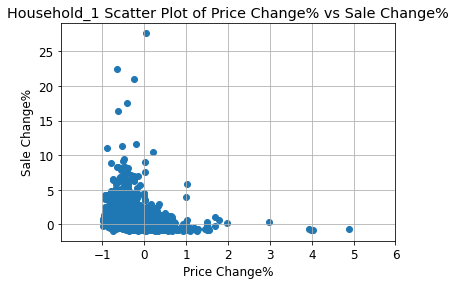

In [240]:
plt.scatter(ho1_df['price_change'], ho1_df['sale_change'])

plt.title('Household_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.xlim(ho1_df['price_change'].min()-1, 6)
# plt.ylim(ho1_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [236]:
ho1_df["revenue"] = ho1_df["price"]*ho1_df["sale_perday"]
ho1_df["LB_price"] = ho1_df["price"] - (0.5*ho1_df["price"])
ho1_df["UB_price"] = ho1_df["price"] + (0.5*ho1_df["price"])
ho1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
0,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.32,2011,1.3,NaN,NaN,NaN,Inelastic Demand,8.216,3.16,9.48
1,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.27,2011,1.227723,-0.007911,-0.055598,-7.027544,Elastic Demand,7.697822,3.135,9.405
2,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.97,2011,1.418699,0.111643,0.155553,-1.393314,Elastic Demand,9.888333,3.485,10.455
3,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.97,2012,1.372549,NaN,NaN,NaN,Inelastic Demand,9.566666,3.485,10.455
4,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,5.97,2012,1.643599,-0.143472,0.197479,1.376429,Elastic Demand,9.812283,2.985,8.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11581,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,7.5,2013,2.466667,-0.058971,-0.052188,-0.884971,Inelastic Demand,18.5,3.75,11.25
11582,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,7.5,2014,2.4,NaN,NaN,NaN,Inelastic Demand,18.0,3.75,11.25
11583,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,6.97,2014,2.522831,-0.070667,0.05118,0.724239,Inelastic Demand,17.584132,3.485,10.455
11584,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,6.97,2015,2.57287,NaN,NaN,NaN,Inelastic Demand,17.932903,3.485,10.455


In [237]:
for index, row in ho1_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    ho1_df.at[index, "opti_price"] = result.x
    ho1_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    ho1_df.at[index, "optimized_revenue"] = ho1_df.at[index, "optimized_units"] * result.x

In [238]:
ho1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
0,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.32,2011,1.3,NaN,NaN,NaN,Inelastic Demand,8.216,3.16,9.48,6.320000,NaN,NaN
1,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.27,2011,1.227723,-0.007911,-0.055598,-7.027544,Elastic Demand,7.697822,3.135,9.405,3.581102,4.927799,17.646951
2,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.97,2011,1.418699,0.111643,0.155553,-1.393314,Elastic Demand,9.888333,3.485,10.455,5.986231,1.697696,10.162802
3,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,6.97,2012,1.372549,NaN,NaN,NaN,Inelastic Demand,9.566666,3.485,10.455,6.970000,NaN,NaN
4,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA,5.97,2012,1.643599,-0.143472,0.197479,1.376429,Elastic Demand,9.812283,2.985,8.955,8.955000,2.774747,24.847855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11581,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,7.5,2013,2.466667,-0.058971,-0.052188,-0.884971,Inelastic Demand,18.5,3.75,11.25,7.987424,2.324798,18.569150
11582,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,7.5,2014,2.4,NaN,NaN,NaN,Inelastic Demand,18.0,3.75,11.25,7.500000,NaN,NaN
11583,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,6.97,2014,2.522831,-0.070667,0.05118,0.724239,Inelastic Demand,17.584132,3.485,10.455,10.455000,3.436398,35.927539
11584,HOUSEHOLD_1_541,HOUSEHOLD_1,HOUSEHOLD,WI,6.97,2015,2.57287,NaN,NaN,NaN,Inelastic Demand,17.932903,3.485,10.455,6.970000,NaN,NaN


In [241]:
household_2=my_data[my_data['dept_id']=="HOUSEHOLD_2"]
household_2 = household_2.drop(household_2[household_2['unit_sale'] == 0].index)


In [242]:
ho2_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = household_2.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        household_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        household_2_df = household_2_df.dropna()

        ho2_df = ho2_df.append(household_2_df, ignore_index=True)

ho2_df['price_change'] = ho2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
ho2_df['sale_change'] = ho2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
ho2_df['elasticity'] = -ho2_df['sale_change'] / ho2_df['price_change']

ho2_df = ho2_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\3380773490.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho2_df = ho2_df.append(household_2_df, ignore_index=True)


In [ ]:
# household_2=my_data[my_data['dept_id']=="HOUSEHOLD_2"]
# household_2 = household_2.drop(household_2[household_2['unit_sale'] == 0].index)

# ho2_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in household_2['item_id'].unique():
#     entry_df = household_2[household_2['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 household_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 household_2_df = household_2_df.dropna()

#                 ho2_df = ho2_df.append(household_2_df, ignore_index=True)

#                 ho2_df['price_change'] = ho2_df['price'].pct_change()*100
#                 ho2_df['sale_change'] = ho2_df['sale_perday'].pct_change()*100
#                 ho2_df['elasticity'] = -ho2_df['sale_change']/ho2_df['price_change'] 
# ho2_df=ho2_df.dropna()
# ho2_df

C:\Users\hp\AppData\Local\Temp\ipykernel_31116\2637425944.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho2_df = ho2_df.append(household_2_df, ignore_index=True)


,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,6.77,1.234892,4.636788,-4.136722,0.892153
2,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,5.97,1.0,-11.816842,-19.021237,-1.609672
3,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,1.99,3.0,-66.666665,200.000000,3.000000
4,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,7.27,1.0,265.326630,-66.666667,0.251263
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,5.87,1.173913,-19.257223,17.391304,0.903106
...,...,...,...,...,...,...,...,...
2146,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,0.98,1.0,-50.253807,-16.232639,-0.323013
2147,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,5.94,1.125437,506.122443,12.543706,-0.024784
2148,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,3.94,2.0,-33.670033,77.708738,2.307950
2149,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,3.0,9.0,-23.857869,350.000000,14.670212


In [243]:
level_values = []


for elasticity in ho2_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


ho2_df['level'] = level_values
ho2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,5.97,2011,1.0,-0.07728,-0.332784,-4.306227,Elastic Demand
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,6.77,2014,1.286689,0.046368,0.023915,-0.515763,Inelastic Demand
10,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,1.99,2012,3.0,-0.692427,1.689655,2.440194,Elastic Demand
13,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,6.77,2014,1.12069,0.046368,-0.057827,1.247141,Elastic Demand
15,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,5.97,2015,1.0,-0.118168,-0.171429,-1.450714,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
11059,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI,19.540001,2015,1.066667,0.089186,0.0,-0.0,Perfectly Inelastic Demand
11067,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,TX,0.98,2015,1.0,-0.502538,-0.19375,-0.385543,Inelastic Demand
11080,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.94,2012,2.0,-0.3367,0.781022,2.319635,Elastic Demand
11081,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.0,2012,9.0,-0.238579,3.5,14.670212,Elastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_26760\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppD

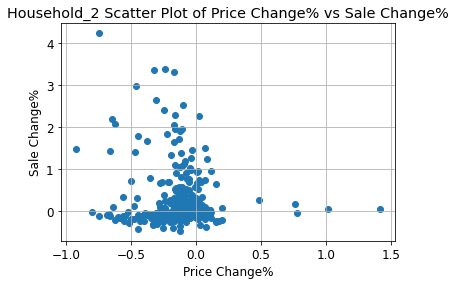

In [244]:
Vis_ho2 = pd.DataFrame()

for item_id in ho2_df['item_id'].unique():
    entry_df = ho2_df[ho2_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_ho2 = Vis_ho2.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_ho2['price_change'], Vis_ho2['sale_change'])

plt.title('Household_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

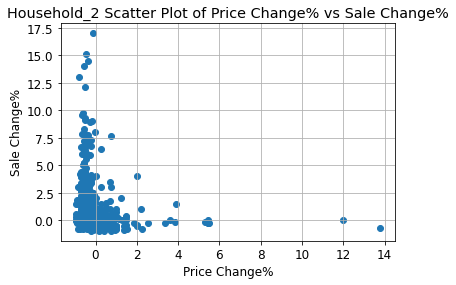

In [245]:
plt.scatter(ho2_df['price_change'], ho2_df['sale_change'])

plt.title('Household_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(ho2_df['price_change'].min(), 5)
# plt.ylim(ho2_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [246]:
ho2_df["revenue"] = ho2_df["price"]*ho2_df["sale_perday"]
ho2_df["LB_price"] = ho2_df["price"] - (0.5*ho2_df["price"])
ho2_df["UB_price"] = ho2_df["price"] + (0.5*ho2_df["price"])
ho2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,5.97,2011,1.0,-0.07728,-0.332784,-4.306227,Elastic Demand,5.97,2.985,8.955
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,6.77,2014,1.286689,0.046368,0.023915,-0.515763,Inelastic Demand,8.710887,3.385,10.155
10,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,1.99,2012,3.0,-0.692427,1.689655,2.440194,Elastic Demand,5.97,0.995,2.985
13,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,6.77,2014,1.12069,0.046368,-0.057827,1.247141,Elastic Demand,7.587069,3.385,10.155
15,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,5.97,2015,1.0,-0.118168,-0.171429,-1.450714,Elastic Demand,5.97,2.985,8.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11059,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI,19.540001,2015,1.066667,0.089186,0.0,-0.0,Perfectly Inelastic Demand,20.842668,9.77,29.310001
11067,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,TX,0.98,2015,1.0,-0.502538,-0.19375,-0.385543,Inelastic Demand,0.98,0.49,1.47
11080,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.94,2012,2.0,-0.3367,0.781022,2.319635,Elastic Demand,7.88,1.97,5.91
11081,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.0,2012,9.0,-0.238579,3.5,14.670212,Elastic Demand,27.0,1.5,4.5


In [247]:
for index, row in ho2_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    ho2_df.at[index, "opti_price"] = result.x
    ho2_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    ho2_df.at[index, "optimized_revenue"] = ho2_df.at[index, "optimized_units"] * result.x

In [ ]:
ho2_df

,item_id,dept_id,cat_id,price,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,6.77,1.234892,4.636788,-4.136722,0.892153,Inelastic Demand,8.360217,3.385,10.155,10.155000,1.785748,18.134266
2,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,5.97,1.0,-11.816842,-19.021237,-1.609672,Elastic Demand,5.97,2.985,8.955,4.839415,1.304836,6.314643
3,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,1.99,3.0,-66.666665,200.000000,3.000000,Elastic Demand,5.97,0.995,2.985,2.985000,7.500000,22.387500
4,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,7.27,1.0,265.326630,-66.666667,0.251263,Inelastic Demand,7.27,3.635,10.905,10.905000,1.125631,12.275009
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,5.87,1.173913,-19.257223,17.391304,0.903106,Inelastic Demand,6.890869,2.935,8.805,8.805000,1.703997,15.003691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,0.98,1.0,-50.253807,-16.232639,-0.323013,Inelastic Demand,0.98,0.49,1.47,1.470000,0.838493,1.232585
2147,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,5.94,1.125437,506.122443,12.543706,-0.024784,Inelastic Demand,6.685096,2.97,8.91,8.910000,1.111491,9.903382
2148,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,3.94,2.0,-33.670033,77.708738,2.307950,Elastic Demand,7.88,1.97,5.91,5.910000,4.307950,25.459982
2149,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,3.0,9.0,-23.857869,350.000000,14.670212,Elastic Demand,27.0,1.5,4.5,4.500000,75.015954,337.571795


In [ ]:
import statsmodels.api as sm

In [ ]:
X_value=np.log(category_prices)
y_value=np.log(my_data.groupby('cat_id')["unit_sale"].sum())

In [ ]:
X = sm.add_constant(X_value)

In [ ]:
model_cat = sm.OLS(y_value, X).fit()

In [ ]:
print(model_cat.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     3.556
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.310
Time:                        14:36:27   Log-Likelihood:                -1.3771
No. Observations:                   3   AIC:                             6.754
Df Residuals:                       1   BIC:                             4.952
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1722      2.455      8.623      0.0

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


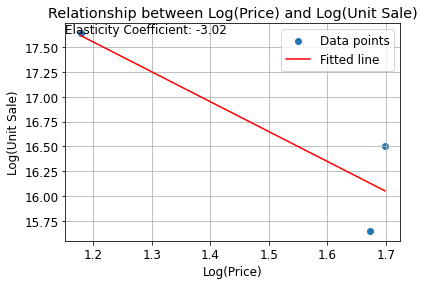

In [ ]:
coefficient = model_cat.params[1]
#elasticity_coefficient = coefficient*(X_value.mean()/y_value.mean())
#print(elasticity_coefficient)

# Scatter plot of log(price) vs log(unit_sale)
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_cat.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
elasticity_dicts=[]

In [ ]:
for cat_id in my_data.cat_id.unique():
    entry={}
    entry_df=my_data[my_data.cat_id==cat_id]
   
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(cat_id,':','elasticity=',model.params[1])
        #print(cat_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(cat_id,':', 'No valid data for regression')
    entry['Category']=cat_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_cat=pd.DataFrame(elasticity_dicts)

HOBBIES : elasticity= -0.26230932523336253
HOUSEHOLD : elasticity= -0.3623659016598186
FOODS : elasticity= -0.4319639813218394


In [ ]:
elasticity_cat

,Category,elasticity
0,HOBBIES,-0.262309
1,HOUSEHOLD,-0.362366
2,FOODS,-0.431964


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

elasticity_dicts = []

for cat_id in my_data.cat_id.unique():
    entry = {}
    entry_df = my_data[my_data.cat_id == cat_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        
        poly = sm.add_constant(X_poly)
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(cat_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

HOBBIES : elasticity= -0.51328814 ,sensitivity level: Inelastic Demand
HOUSEHOLD : elasticity= -0.86524695 ,sensitivity level: Inelastic Demand
FOODS : elasticity= -0.5395993 ,sensitivity level: Inelastic Demand


In [ ]:
X_value=np.log(my_data.groupby("dept_id")["sell_price"].mean())
y_value=np.log(my_data.groupby('dept_id')["unit_sale"].sum())

In [ ]:
X = sm.add_constant(X_value)

In [ ]:
model_dept = sm.OLS(y_value, X).fit()

In [ ]:
print(model_dept.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.185
Method:                 Least Squares   F-statistic:                   0.06465
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.809
Time:                        14:37:31   Log-Likelihood:                -11.003
No. Observations:                   7   AIC:                             26.01
Df Residuals:                       5   BIC:                             25.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9220      2.389      6.245      0.0

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


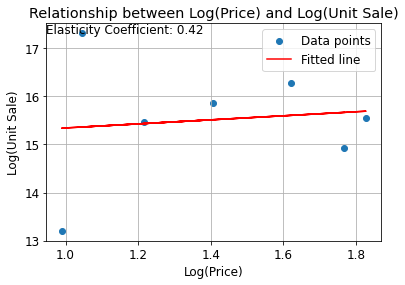

In [ ]:

coefficient = model_dept.params[1]
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_dept.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
elasticity_dicts=[]

In [ ]:
for dept_id in my_data.dept_id.unique():
    entry={}
    entry_df=my_data[my_data.dept_id==dept_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(dept_id,':','elasticity=',model.params[1])
        #print(dept_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(dept_id,':', 'No valid data for regression')
    entry['Department']=dept_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_dept=pd.DataFrame(elasticity_dicts)

HOBBIES_1 : elasticity= -0.3050555884519819
HOBBIES_2 : elasticity= -0.12786563203944085
HOUSEHOLD_1 : elasticity= -0.37550897701332797
HOUSEHOLD_2 : elasticity= -0.14644530647003312
FOODS_1 : elasticity= -0.3692719597496199
FOODS_2 : elasticity= -0.32421028033196797
FOODS_3 : elasticity= -0.45744143345466826


In [ ]:
elasticity_dept

,Department,elasticity
0,HOBBIES_1,-0.305056
1,HOBBIES_2,-0.127866
2,HOUSEHOLD_1,-0.375509
3,HOUSEHOLD_2,-0.146445
4,FOODS_1,-0.369272
5,FOODS_2,-0.324210
6,FOODS_3,-0.457441


In [ ]:
elasticity_dicts = []

for dept_id in my_data.dept_id.unique():
    entry = {}
    entry_df = my_data[my_data.dept_id == dept_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        poly = sm.add_constant(X_poly)
        
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(dept_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

HOBBIES_1 : elasticity= -0.6156592 ,sensitivity level: Inelastic Demand
HOBBIES_2 : elasticity= -0.17806497 ,sensitivity level: Inelastic Demand
HOUSEHOLD_1 : elasticity= -0.8999993 ,sensitivity level: Inelastic Demand
HOUSEHOLD_2 : elasticity= -0.20574239 ,sensitivity level: Inelastic Demand
FOODS_1 : elasticity= -0.9299321 ,sensitivity level: Inelastic Demand
FOODS_2 : elasticity= -1.021008 ,sensitivity level: Elastic Demand
FOODS_3 : elasticity= -0.48617503 ,sensitivity level: Inelastic Demand


In [ ]:
X_value=np.log(my_data.groupby("state_id")["sell_price"].mean())
y_value=np.log(my_data.groupby('state_id')["unit_sale"].sum())

In [ ]:
X = sm.add_constant(X_value)

In [ ]:
model_state = sm.OLS(y_value, X).fit()

In [ ]:
print(model_state.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.983
Method:                 Least Squares   F-statistic:                  0.008436
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.942
Time:                        14:38:27   Log-Likelihood:                0.48720
No. Observations:                   3   AIC:                             3.026
Df Residuals:                       1   BIC:                             1.223
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1860     51.308      0.238      0.8

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


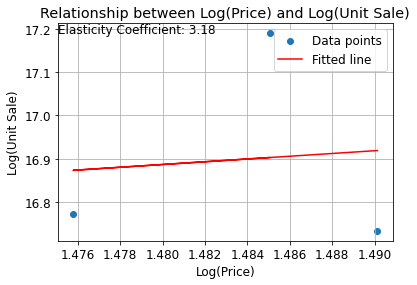

In [ ]:

coefficient = model_state.params[1]
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_state.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
elasticity_dicts=[]

In [ ]:
for state_id in my_data.state_id.unique():
    entry={}
    entry_df=my_data[my_data.state_id==state_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(state_id,':','elasticity=',model.params[1])
        #print(state_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(state_id,':', 'No valid data for regression')
    entry['Department']=state_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_state=pd.DataFrame(elasticity_dicts)

CA : elasticity= -0.3879413025438883
TX : elasticity= -0.3773369635910164
WI : elasticity= -0.4136240443712191


In [ ]:
elasticity_state

,Department,elasticity
0,CA,-0.387941
1,TX,-0.377337
2,WI,-0.413624


In [ ]:
elasticity_dicts = []

for state_id in my_data.state_id.unique():
    entry = {}
    entry_df = my_data[my_data.state_id == state_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        poly = sm.add_constant(X_poly)
        
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(state_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

CA : elasticity= -0.49642023 ,sensitivity level: Inelastic Demand
TX : elasticity= -0.49649376 ,sensitivity level: Inelastic Demand
WI : elasticity= -0.5340249 ,sensitivity level: Inelastic Demand


In [ ]:
X_value=np.log(my_data.groupby("store_id")["sell_price"].mean())
y_value=np.log(my_data.groupby('store_id')["unit_sale"].sum())

In [ ]:
X = sm.add_constant(X_value)

In [ ]:
model_store = sm.OLS(y_value, X).fit()

In [ ]:
print(model_store.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.420
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.268
Time:                        14:39:34   Log-Likelihood:                0.42609
No. Observations:                  10   AIC:                             3.148
Df Residuals:                       8   BIC:                             3.753
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9169     17.822      2.071      0.0

c:\Users\hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


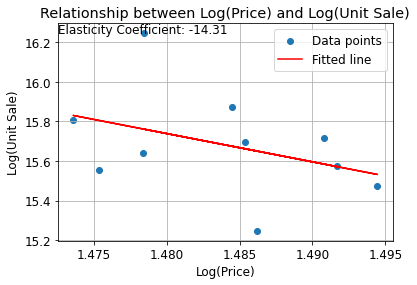

In [ ]:
coefficient = model_store.params[1]
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_store.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
elasticity_dicts=[]

In [ ]:
for store_id in my_data.store_id.unique():
    entry={}
    entry_df=my_data[my_data.store_id==store_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(store_id,':','elasticity=',model.params[1])
        #print(store_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(store_id,':', 'No valid data for regression')
    entry['Store']=store_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_store=pd.DataFrame(elasticity_dicts)

CA_1 : elasticity= -0.4090038859764377
CA_2 : elasticity= -0.34979792573053925
CA_3 : elasticity= -0.4438411870124484
CA_4 : elasticity= -0.3431553733551852
TX_1 : elasticity= -0.3796984232612194
TX_2 : elasticity= -0.38909371482692434
TX_3 : elasticity= -0.3633118550139723
WI_1 : elasticity= -0.37350960470347816
WI_2 : elasticity= -0.44042454751131715
WI_3 : elasticity= -0.4290966694375496


In [ ]:
elasticity_store

,Store,elasticity
0,CA_1,-0.409004
1,CA_2,-0.349798
2,CA_3,-0.443841
3,CA_4,-0.343155
4,TX_1,-0.379698
5,TX_2,-0.389094
6,TX_3,-0.363312
7,WI_1,-0.373510
8,WI_2,-0.440425
9,WI_3,-0.429097


In [ ]:
elasticity_dicts = []

for store_id in my_data.store_id.unique():
    entry = {}
    entry_df = my_data[my_data.store_id == store_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        poly = sm.add_constant(X_poly)
        
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(store_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

CA_1 : elasticity= -0.5158361 ,sensitivity level: Inelastic Demand
CA_2 : elasticity= -0.39972478 ,sensitivity level: Inelastic Demand
CA_3 : elasticity= -0.5881433 ,sensitivity level: Inelastic Demand
CA_4 : elasticity= -0.46522355 ,sensitivity level: Inelastic Demand
TX_1 : elasticity= -0.48442423 ,sensitivity level: Inelastic Demand
TX_2 : elasticity= -0.52232623 ,sensitivity level: Inelastic Demand
TX_3 : elasticity= -0.48063073 ,sensitivity level: Inelastic Demand
WI_1 : elasticity= -0.45853296 ,sensitivity level: Inelastic Demand
WI_2 : elasticity= -0.5893807 ,sensitivity level: Inelastic Demand
WI_3 : elasticity= -0.5610014 ,sensitivity level: Inelastic Demand


In [249]:
# hobbies_1.to_csv('hobbies_1.csv')
# hobbies_2.to_csv('hobbies_2.csv')
# household_1.to_csv('household_1.csv')
# household_2.to_csv('household_2.csv')
# food_1.to_csv('food_1.csv')
# food_2.to_csv('food_2.csv')
# food_3.to_csv('food_3.csv')

In [248]:
h1_df.to_csv('h1_df.csv')
h2_df.to_csv('h2_df.csv')
ho1_df.to_csv('ho1_df.csv')
ho2_df.to_csv('ho2_df.csv')
f1_df.to_csv('f1_df.csv')
f2_df.to_csv('f2_df.csv')
f3_df.to_csv('f3_df.csv')